# Sistem rekomendasi buku

## Data Understanding

Untuk dapat membangun sistem rekomendasi buku, kita memerlukan dataset terlebih dahulu. Kali ini, kita mengambil data dari [Kaggle](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset). 

In [1]:
import pandas as pd
import numpy as np

books = pd.read_csv('data/BX_Books.csv', sep=';', encoding='latin-1')
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', encoding='latin-1')
users = pd.read_csv('data/BX-Users.csv', sep=';', encoding='latin-1')

**Insight** : Dataset yang kita miliki terdiri dari 3 file, yaitu:
- BX_Books.csv : Berisi informasi seputar buku yang tersedia pada dataset
- BX-Book-Ratings.csv : Berisi informasi seputar rating yang dilakukan user terhadap suatu buku
- BX-Users.csv : Berisi informasi seputar user yang tersedia pada dataset

Informasi mengenai datasetnya sendiri yaitu terdiri dari 278,858 users anonim tetapi dengan informasi demografi yang menyediakan 1,149,780 ratings (explicit / implicit) tentang 271,379 books.

In [2]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


**Insight** : 

In [3]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
print('Jumlah buku:', len(books.ISBN.unique()))
print('Jumlah rating:', ratings.shape[0] - ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Jumlah user:', len(users['User-ID'].unique()))

Jumlah buku: 271379
Jumlah rating: 1149780
Jumlah user: 278858


In [6]:
ratings.duplicated(subset=['User-ID', 'ISBN']).sum()

np.int64(0)

In [7]:
sampled_books = np.random.choice(books.ISBN.unique(), size=10000, replace=False)
subset_books = books[books.ISBN.isin(sampled_books)]

In [9]:
subset_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
49,0440223571,This Year It Will Be Different: And Other Stories,Maeve Binchy,1997,Dell,http://images.amazon.com/images/P/0440223571.0...,http://images.amazon.com/images/P/0440223571.0...,http://images.amazon.com/images/P/0440223571.0...
61,0679810307,Shabanu: Daughter of the Wind (Border Trilogy),SUZANNE FISHER STAPLES,1991,Laurel Leaf,http://images.amazon.com/images/P/0679810307.0...,http://images.amazon.com/images/P/0679810307.0...,http://images.amazon.com/images/P/0679810307.0...
84,0743403843,Decipher,Stel Pavlou,2002,Simon & Schuster (Trade Division),http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...
86,0060177586,Standing Firm: A Vice-Presidential Memoir,Dan Quayle,1994,Harpercollins,http://images.amazon.com/images/P/0060177586.0...,http://images.amazon.com/images/P/0060177586.0...,http://images.amazon.com/images/P/0060177586.0...
144,0451410319,Hush,Anne Frasier,2002,Onyx Books,http://images.amazon.com/images/P/0451410319.0...,http://images.amazon.com/images/P/0451410319.0...,http://images.amazon.com/images/P/0451410319.0...
...,...,...,...,...,...,...,...,...
271235,981232397X,Journeys Through Southeast Asia - Ceritalah 2,Karim Raslan,2002,Times Media Pte Ltd,http://images.amazon.com/images/P/981232397X.0...,http://images.amazon.com/images/P/981232397X.0...,http://images.amazon.com/images/P/981232397X.0...
271263,3426618354,Wer stirbt schon gerne in Italien?,Michael BÃ?Â¶ckler,2001,"Droemersche Verlagsanstalt Th. Knaur Nachf., G...",http://images.amazon.com/images/P/3426618354.0...,http://images.amazon.com/images/P/3426618354.0...,http://images.amazon.com/images/P/3426618354.0...
271308,189369948X,Iron Insects Invade Indiana (American Chillers),Johnathan Rand,2003,Audio Craft Press,http://images.amazon.com/images/P/189369948X.0...,http://images.amazon.com/images/P/189369948X.0...,http://images.amazon.com/images/P/189369948X.0...
271330,0304329045,How Can You Write a Poem When You Are Dying of...,John Harold,1994,Cassell,http://images.amazon.com/images/P/0304329045.0...,http://images.amazon.com/images/P/0304329045.0...,http://images.amazon.com/images/P/0304329045.0...


In [10]:
sampled_users = np.random.choice(users['User-ID'].unique(), size=10000, replace=False)
subset_users = users[users['User-ID'].isin(sampled_users)]

In [11]:
subset_users

,User-ID,Location,Age
4,5,"farnborough, hants, united kingdom",NaN
7,8,"timmins, ontario, canada",NaN
22,23,"philadelphia, pennsylvania, usa",NaN
54,55,"calgary, alberta, canada",NaN
79,80,"etobicoke, ontario, canada",NaN
...,...,...,...
278665,278666,"berlin, berlin, germany",32.0
278731,278732,"victoria, british columbia, canada",NaN
278745,278746,"johannesburg, gauteng, south africa",55.0
278750,278751,"casalnuovo (na), campania, italy",NaN


In [12]:
subset_ratings = ratings[
    (ratings.ISBN.isin(sampled_books)) & 
    (ratings['User-ID'].isin(sampled_users))
].drop_duplicates(subset=['User-ID', 'ISBN'])

subset_ratings

,User-ID,ISBN,Book-Rating
4226,278346,0394484479,9
10961,567,0684717255,9
12525,1235,0345378490,9
15721,2399,0345317580,7
17741,3332,0752851950,0
...,...,...,...
1135184,272897,0859539075,7
1135192,272897,1577593715,7
1136790,273470,0446320277,0
1142191,274325,0399147195,9


In [13]:
print('Dataset subset:')
print('Jumlah buku:', len(subset_books.ISBN.unique()))
print('Jumlah rating:', len(subset_ratings))
print('Jumlah user:', len(subset_users['User-ID'].unique()))

Dataset subset:
Jumlah buku: 10000
Jumlah rating: 1545
Jumlah user: 10000


## Univariate Exploratory Data Analysis

- books = buku yang tersedia pada dataset
- ratings = penilaian buku oleh user
- users = data user

### Books Variable

In [16]:
subset_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 49 to 271375
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 10000 non-null  object
 1   Book-Title           10000 non-null  object
 2   Book-Author          10000 non-null  object
 3   Year-Of-Publication  10000 non-null  int64 
 4   Publisher            9999 non-null   object
 5   Image-URL-S          10000 non-null  object
 6   Image-URL-M          10000 non-null  object
 7   Image-URL-L          10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 703.1+ KB


In [18]:
print('Banyak data:', len(subset_books.ISBN.unique()))
print('Judul buku yang tersedia:', subset_books['Book-Title'].unique())

Banyak data: 10000
Judul buku yang tersedia: ['This Year It Will Be Different: And Other Stories'
 'Shabanu: Daughter of the Wind (Border Trilogy)' 'Decipher' ...
 'Iron Insects Invade Indiana (American Chillers)'
 'How Can You Write a Poem When You Are Dying of Aids? (Cassell Lesbian and Gay Studies)'
 'From One to One Hundred']


### Ratings Variable

In [19]:
subset_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 4226 to 1144627
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      1545 non-null   int64 
 1   ISBN         1545 non-null   object
 2   Book-Rating  1545 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 48.3+ KB


In [20]:
print('Banyak data:', subset_ratings.shape[0] - subset_ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Nilai rating yang ada pada dataset:', np.sort(subset_ratings['Book-Rating'].unique()))
print('Banyak user yang memberikan rating:', len(subset_ratings['User-ID'].unique()))

Banyak data: 1545
Nilai rating yang ada pada dataset: [ 0  1  2  3  4  5  6  7  8  9 10]
Banyak user yang memberikan rating: 467


In [21]:
subset_ratings.describe()

,User-ID,Book-Rating
count,1545.000000,1545.000000
mean,162006.853074,2.624595
std,82060.270338,3.735097
min,567.000000,0.000000
25%,91203.000000,0.000000
50%,170704.000000,0.000000
75%,242824.000000,7.000000
max,278346.000000,10.000000


In [22]:
subset_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 4 to 278824
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   10000 non-null  int64  
 1   Location  10000 non-null  object 
 2   Age       5998 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 312.5+ KB


In [23]:
print('Banyak data:', len(subset_users['User-ID'].unique()))
print('User yang ada pada dataset:', subset_users['User-ID'].unique())

Banyak data: 10000
User yang ada pada dataset: [     5      8     23 ... 278746 278751 278825]


### Exploratory Data Analysis

#### Top 20 Books

In [24]:
Unique_title = pd.unique(subset_books['Book-Title'].values.ravel())
print("Number of Unique values: ",subset_books['Book-Title'].nunique())
Value_Unique_title = subset_books['Book-Title'].value_counts()
Value_Unique_title.head(50)

Number of Unique values:  9922


Book-Title
The Secret Garden                                     3
The Mask                                              3
The Outsider                                          3
Legacy                                                3
The Trikon Deception                                  2
The Ugly Duckling (Fairy Tale Classics Storybook)     2
Aura                                                  2
ON WAY TO WEDDING                                     2
The Fixer                                             2
The Roosevelt Women                                   2
The Bronze King (The Sorcery Hall Trilogy, Book 1)    2
Iron Lace                                             2
Old Songs in a New Cafe : Selected Essays             2
Stranger in the Mirror                                2
And The Angels Were Silent                            2
The Satanic Verses                                    2
Split Image: The Life of Anthony Perkins              2
The Whole Truth                      

Text(0.5, 1.0, 'Top 20 Books - Count')

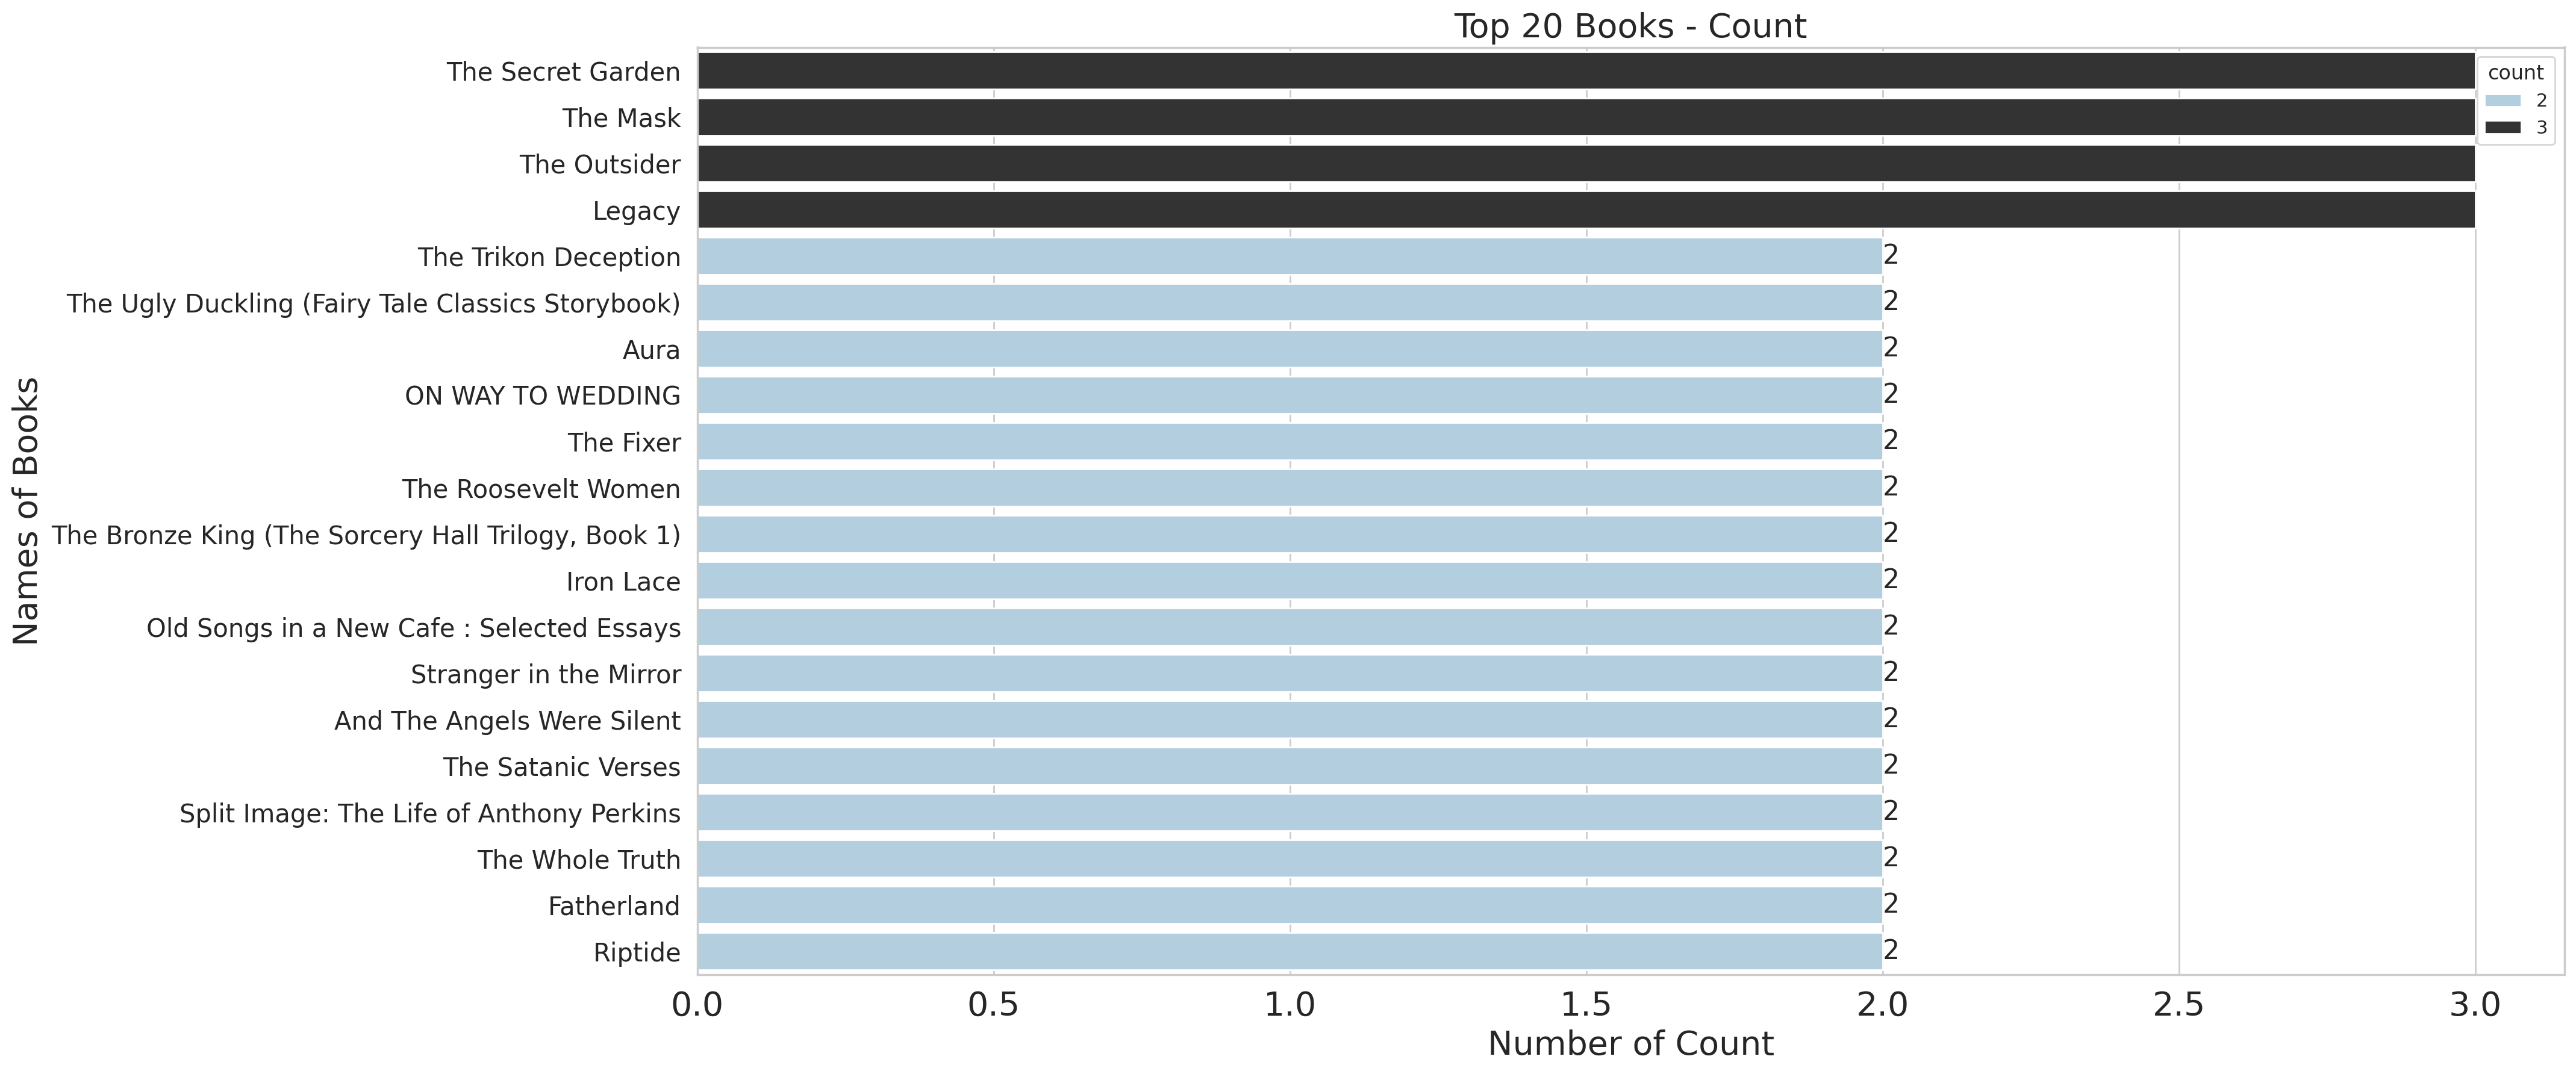

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_books = subset_books['Book-Title'].value_counts()[:20]
ax = sns.barplot(x= Top_20_books, y= Top_20_books.index, palette="Blues_d", hue=Top_20_books)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Books - Count", fontsize= 20)

In [26]:
subset_books.loc[subset_books['Book-Title'] == 'The Secret Garden']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
40445,0590471724,The Secret Garden,M.J. Carr,1993,Scholastic Paperbacks (Mm),http://images.amazon.com/images/P/0590471724.0...,http://images.amazon.com/images/P/0590471724.0...,http://images.amazon.com/images/P/0590471724.0...
58792,0440977096,The Secret Garden,Frances Hodgson Burnett,1989,Laure Leaf,http://images.amazon.com/images/P/0440977096.0...,http://images.amazon.com/images/P/0440977096.0...,http://images.amazon.com/images/P/0440977096.0...
162404,1569874115,The Secret Garden,Frances Hodgson Burnett,0,Landoll,http://images.amazon.com/images/P/1569874115.0...,http://images.amazon.com/images/P/1569874115.0...,http://images.amazon.com/images/P/1569874115.0...


#### Top 20 Authors

In [27]:
Unique_author = pd.unique(subset_books['Book-Author'].values.ravel())
print("Number of Unique values: ",subset_books['Book-Author'].nunique())
Value_Unique_author = subset_books['Book-Author'].value_counts()
Value_Unique_author.head(50)

Number of Unique values:  8027


Book-Author
Agatha Christie            29
Stephen King               25
Francine Pascal            17
Charles Dickens            13
Ann M. Martin              13
Carolyn Keene              12
Terry Pratchett            12
Piers Anthony              12
Nora Roberts               11
Franklin W. Dixon          11
Danielle Steel              9
Jayne Ann Krentz            9
Fern Michaels               9
Janet Dailey                9
Ernest Hemingway            9
Anne Rice                   9
Judy Blume                  8
Ben Bova                    8
Isaac Asimov                8
Frances Hodgson Burnett     8
William Shakespeare         8
Norman Bridwell             8
Anne McCaffrey              8
Barbara Cartland            8
Tony Hillerman              8
Hermann Hesse               8
Max Lucado                  8
Mark Twain                  8
Ed McBain                   8
J. R. R. Tolkien            8
Anne Perry                  7
Margaret Weis               7
James A. Michener           

Text(0.5, 1.0, 'Top 20 Author - Count')

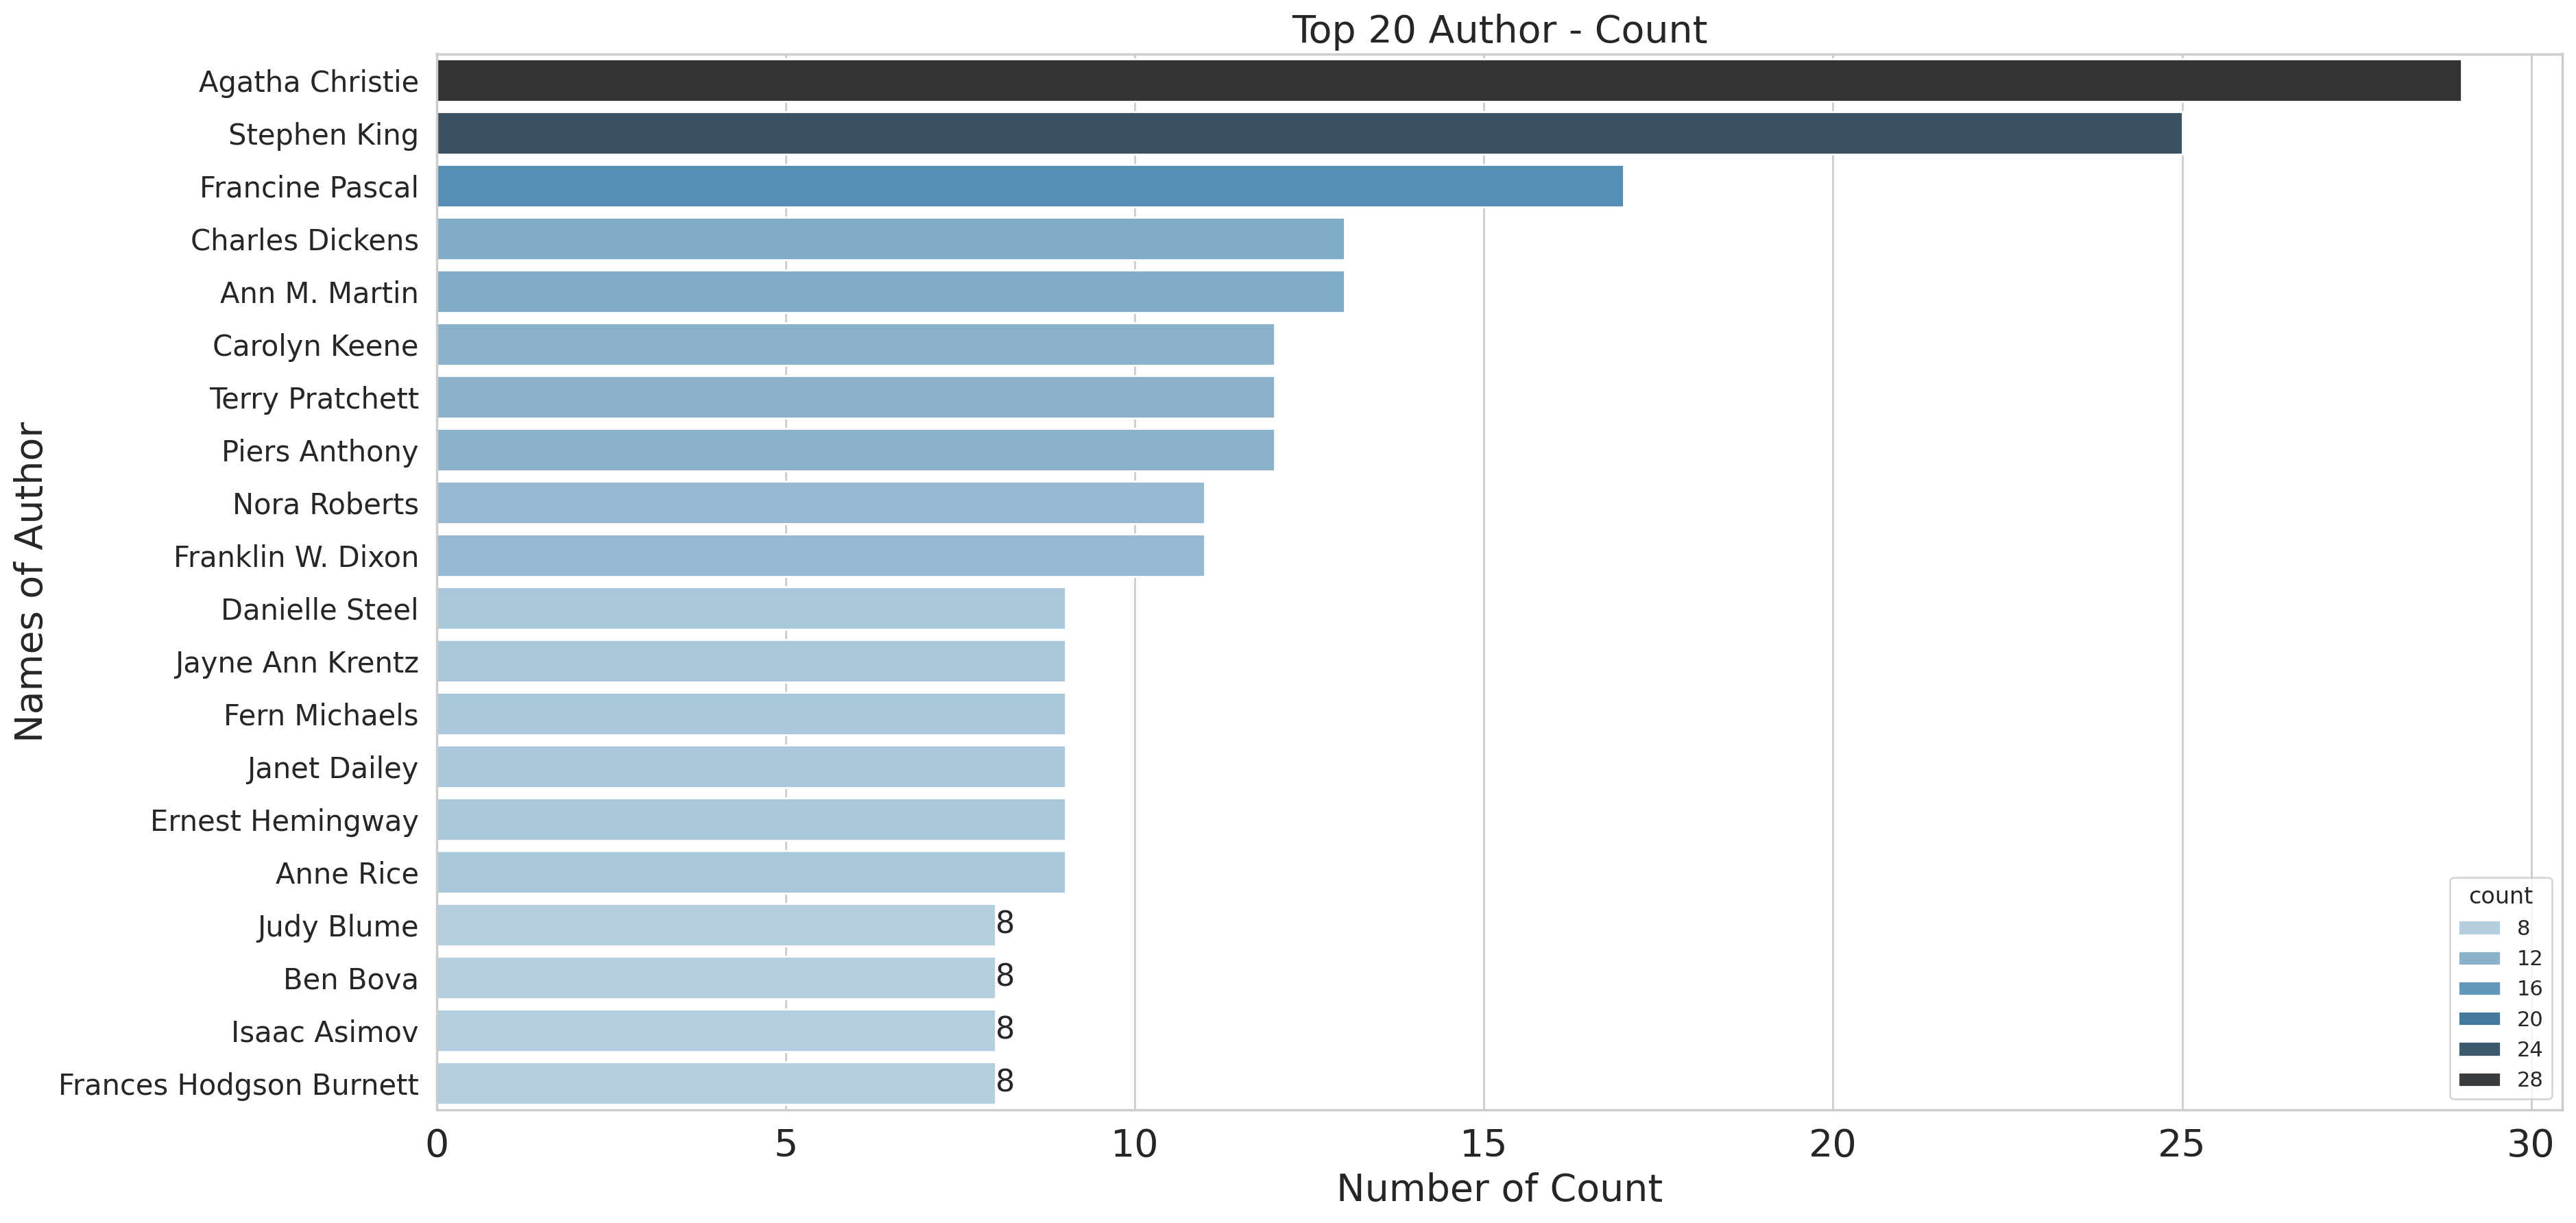

In [28]:
sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_author = subset_books['Book-Author'].value_counts()[:20]
ax = sns.barplot(x= Top_20_author, y= Top_20_author.index, palette="Blues_d", hue=Top_20_author)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Author", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Author - Count", fontsize= 20)

In [29]:
subset_books.loc[subset_books['Book-Author'] == 'Agatha Christie']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
21458,0425093255,Five Little Pigs (Hercule Poirot Mysteries (Pa...,Agatha Christie,2004,Berkley Publishing Group,http://images.amazon.com/images/P/0425093255.0...,http://images.amazon.com/images/P/0425093255.0...,http://images.amazon.com/images/P/0425093255.0...
22992,0671464965,BODY IN LIBRARY (Miss Marple Mysteries (Paperb...,Agatha Christie,1983,Pocket,http://images.amazon.com/images/P/0671464965.0...,http://images.amazon.com/images/P/0671464965.0...,http://images.amazon.com/images/P/0671464965.0...
23002,0671823337,Towards Zero,Agatha Christie,0,Pocket Books,http://images.amazon.com/images/P/0671823337.0...,http://images.amazon.com/images/P/0671823337.0...,http://images.amazon.com/images/P/0671823337.0...
27146,0886461707,"Agatha Christie Mysteries: Philomel Cottage, t...",Agatha Christie,1986,DH Audio,http://images.amazon.com/images/P/0886461707.0...,http://images.amazon.com/images/P/0886461707.0...,http://images.amazon.com/images/P/0886461707.0...
41405,0312979487,The Man in the Brown Suit (St. Martin's Minota...,Agatha Christie,2001,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312979487.0...,http://images.amazon.com/images/P/0312979487.0...,http://images.amazon.com/images/P/0312979487.0...
44417,0671542036,Halloween Party,Agatha Christie,1984,Pocket,http://images.amazon.com/images/P/0671542036.0...,http://images.amazon.com/images/P/0671542036.0...,http://images.amazon.com/images/P/0671542036.0...
52437,0646418432,Agatha Christie's Mysterious Affair at Styles,Agatha Christie,2002,Deodand Publishing,http://images.amazon.com/images/P/0646418432.0...,http://images.amazon.com/images/P/0646418432.0...,http://images.amazon.com/images/P/0646418432.0...
59181,0671427822,NEMESIS,Agatha Christie,1980,Pocket,http://images.amazon.com/images/P/0671427822.0...,http://images.amazon.com/images/P/0671427822.0...,http://images.amazon.com/images/P/0671427822.0...
66501,8427285205,Asesinato en el Orient Express,Agatha Christie,1997,Distribooks Inc,http://images.amazon.com/images/P/8427285205.0...,http://images.amazon.com/images/P/8427285205.0...,http://images.amazon.com/images/P/8427285205.0...
76179,0425067890,The Murder at Hazelmoor,Agatha Christie,1984,Berkley Publishing Group,http://images.amazon.com/images/P/0425067890.0...,http://images.amazon.com/images/P/0425067890.0...,http://images.amazon.com/images/P/0425067890.0...


#### Top 20 Publisher

In [30]:
Unique_publisher = pd.unique(subset_books['Publisher'].values.ravel())
print("Number of Unique values: ",subset_books['Publisher'].nunique())
Value_Unique_publisher = subset_books['Publisher'].value_counts()
Value_Unique_publisher.head(50)

Number of Unique values:  2572


Publisher
Harlequin                             295
Silhouette                            184
Pocket                                160
Ballantine Books                      124
Bantam Books                          123
Simon & Schuster                      116
Berkley Publishing Group              114
Scholastic                            112
Penguin Books                         111
Warner Books                          102
Penguin USA                           100
Signet Book                            82
Fawcett Books                          82
Harpercollins                          75
Tor Books                              70
St Martins Pr                          70
St. Martin's Press                     69
Zebra Books                            69
Random House Inc                       66
Perennial                              61
Vintage Books USA                      60
HarperCollins Publishers               59
Oxford University Press                58
Bantam                  

Text(0.5, 1.0, 'Top 20 Publisher - Count')

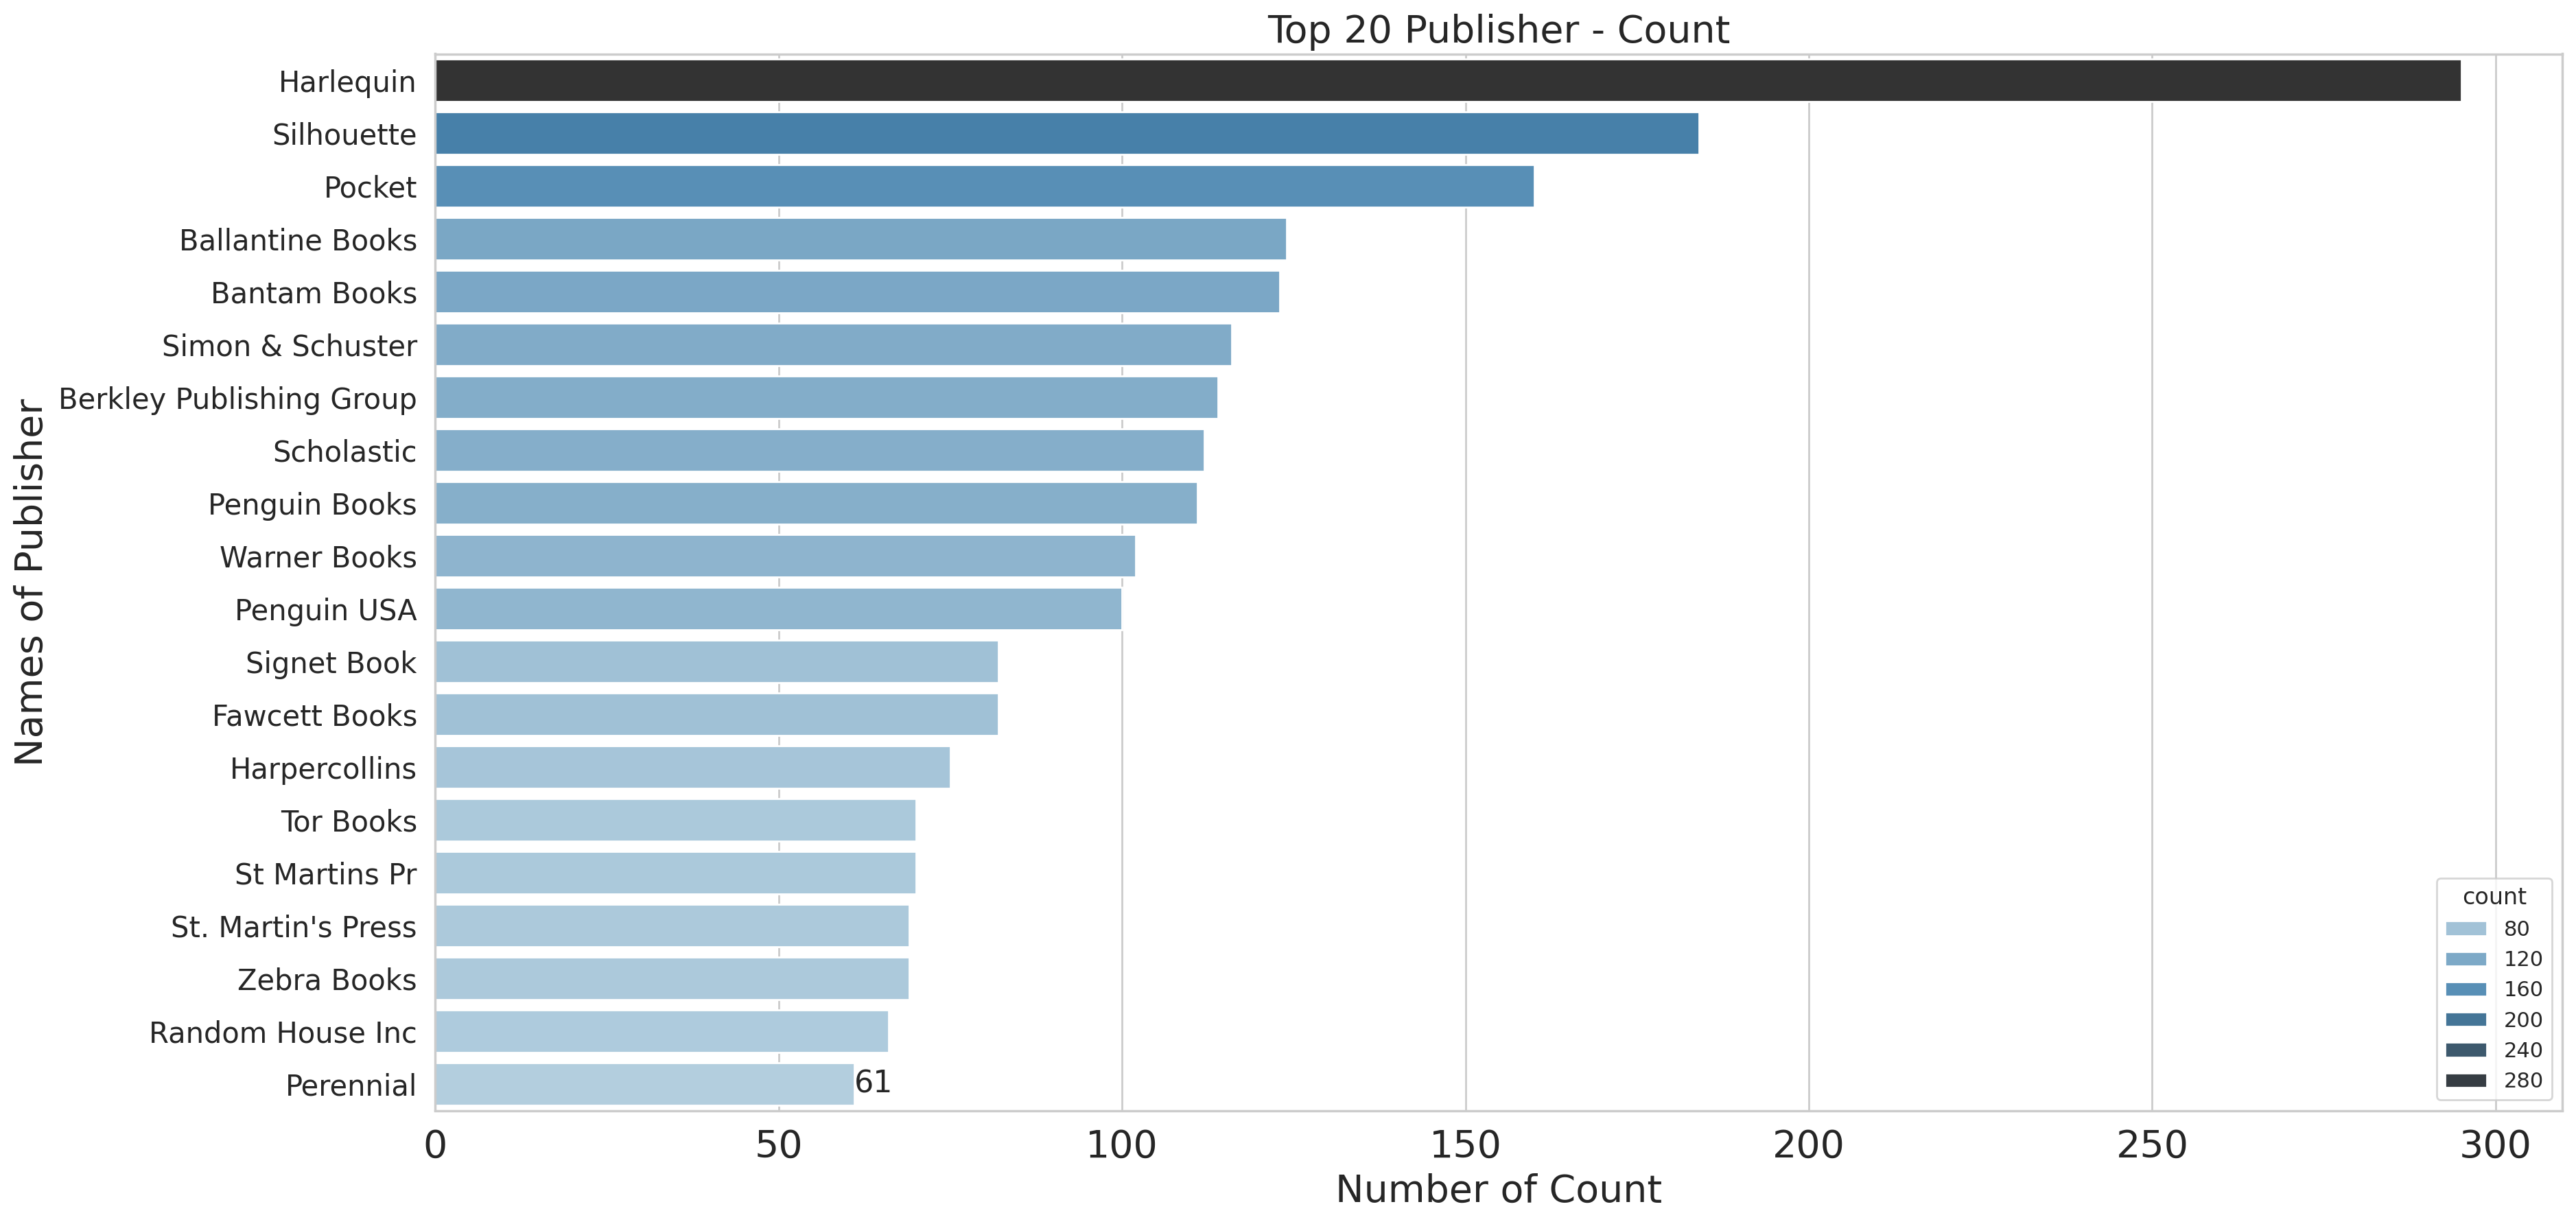

In [31]:
sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_publisher = subset_books['Publisher'].value_counts()[:20]
ax = sns.barplot(x= Top_20_publisher, y= Top_20_publisher.index, palette="Blues_d", hue=Top_20_publisher)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Publisher", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Publisher - Count", fontsize= 20)

In [32]:
subset_books.loc[subset_books['Publisher'] == 'Harlequin']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1548,0373711123,Another Man's Wife,Rebecca Winters,2003,Harlequin,http://images.amazon.com/images/P/0373711123.0...,http://images.amazon.com/images/P/0373711123.0...,http://images.amazon.com/images/P/0373711123.0...
2578,0373123523,The Parisian Playboy In Love With Her Boss,Helen Brooks,2003,Harlequin,http://images.amazon.com/images/P/0373123523.0...,http://images.amazon.com/images/P/0373123523.0...,http://images.amazon.com/images/P/0373123523.0...
5127,0373169884,The Playboy's Protegee (Harlequin American Rom...,Michele Dunaway,2003,Harlequin,http://images.amazon.com/images/P/0373169884.0...,http://images.amazon.com/images/P/0373169884.0...,http://images.amazon.com/images/P/0373169884.0...
5730,0373706847,Married To The Man (Reunited) (Harlequin Super...,Caroline Arnold,1996,Harlequin,http://images.amazon.com/images/P/0373706847.0...,http://images.amazon.com/images/P/0373706847.0...,http://images.amazon.com/images/P/0373706847.0...
6703,0373168284,"Big-City Bachelor (Harlequin American Romance,...",Ingrid Weaver,2000,Harlequin,http://images.amazon.com/images/P/0373168284.0...,http://images.amazon.com/images/P/0373168284.0...,http://images.amazon.com/images/P/0373168284.0...
...,...,...,...,...,...,...,...,...
268454,0373825757,Playboy Lover (The Australians) (The Australia...,Lindsay Armstrong,1998,Harlequin,http://images.amazon.com/images/P/0373825757.0...,http://images.amazon.com/images/P/0373825757.0...,http://images.amazon.com/images/P/0373825757.0...
269683,0373037872,"Her Boss's Marriage Agenda (Harlequin Romance,...",Jessica Steele,2004,Harlequin,http://images.amazon.com/images/P/0373037872.0...,http://images.amazon.com/images/P/0373037872.0...,http://images.amazon.com/images/P/0373037872.0...
269989,0373036620,"Their Baby Bargain (Parents Wanted) (Romance, ...",Marion Lennox,2001,Harlequin,http://images.amazon.com/images/P/0373036620.0...,http://images.amazon.com/images/P/0373036620.0...,http://images.amazon.com/images/P/0373036620.0...
270014,0373163339,"Sight Unseen (American Romance, 333)",Mary Higgins Clark,1990,Harlequin,http://images.amazon.com/images/P/0373163339.0...,http://images.amazon.com/images/P/0373163339.0...,http://images.amazon.com/images/P/0373163339.0...


#### Top 20 User

In [38]:
top_users = subset_ratings['User-ID'].value_counts()

top_users

User-ID
245963    97
52584     85
242824    73
269566    53
95359     53
          ..
266299     1
266764     1
266854     1
266992     1
267657     1
Name: count, Length: 467, dtype: int64

In [39]:
top_users.unique()

array([97, 85, 73, 53, 50, 43, 33, 27, 24, 23, 22, 19, 18, 17, 16, 15, 14,
       10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

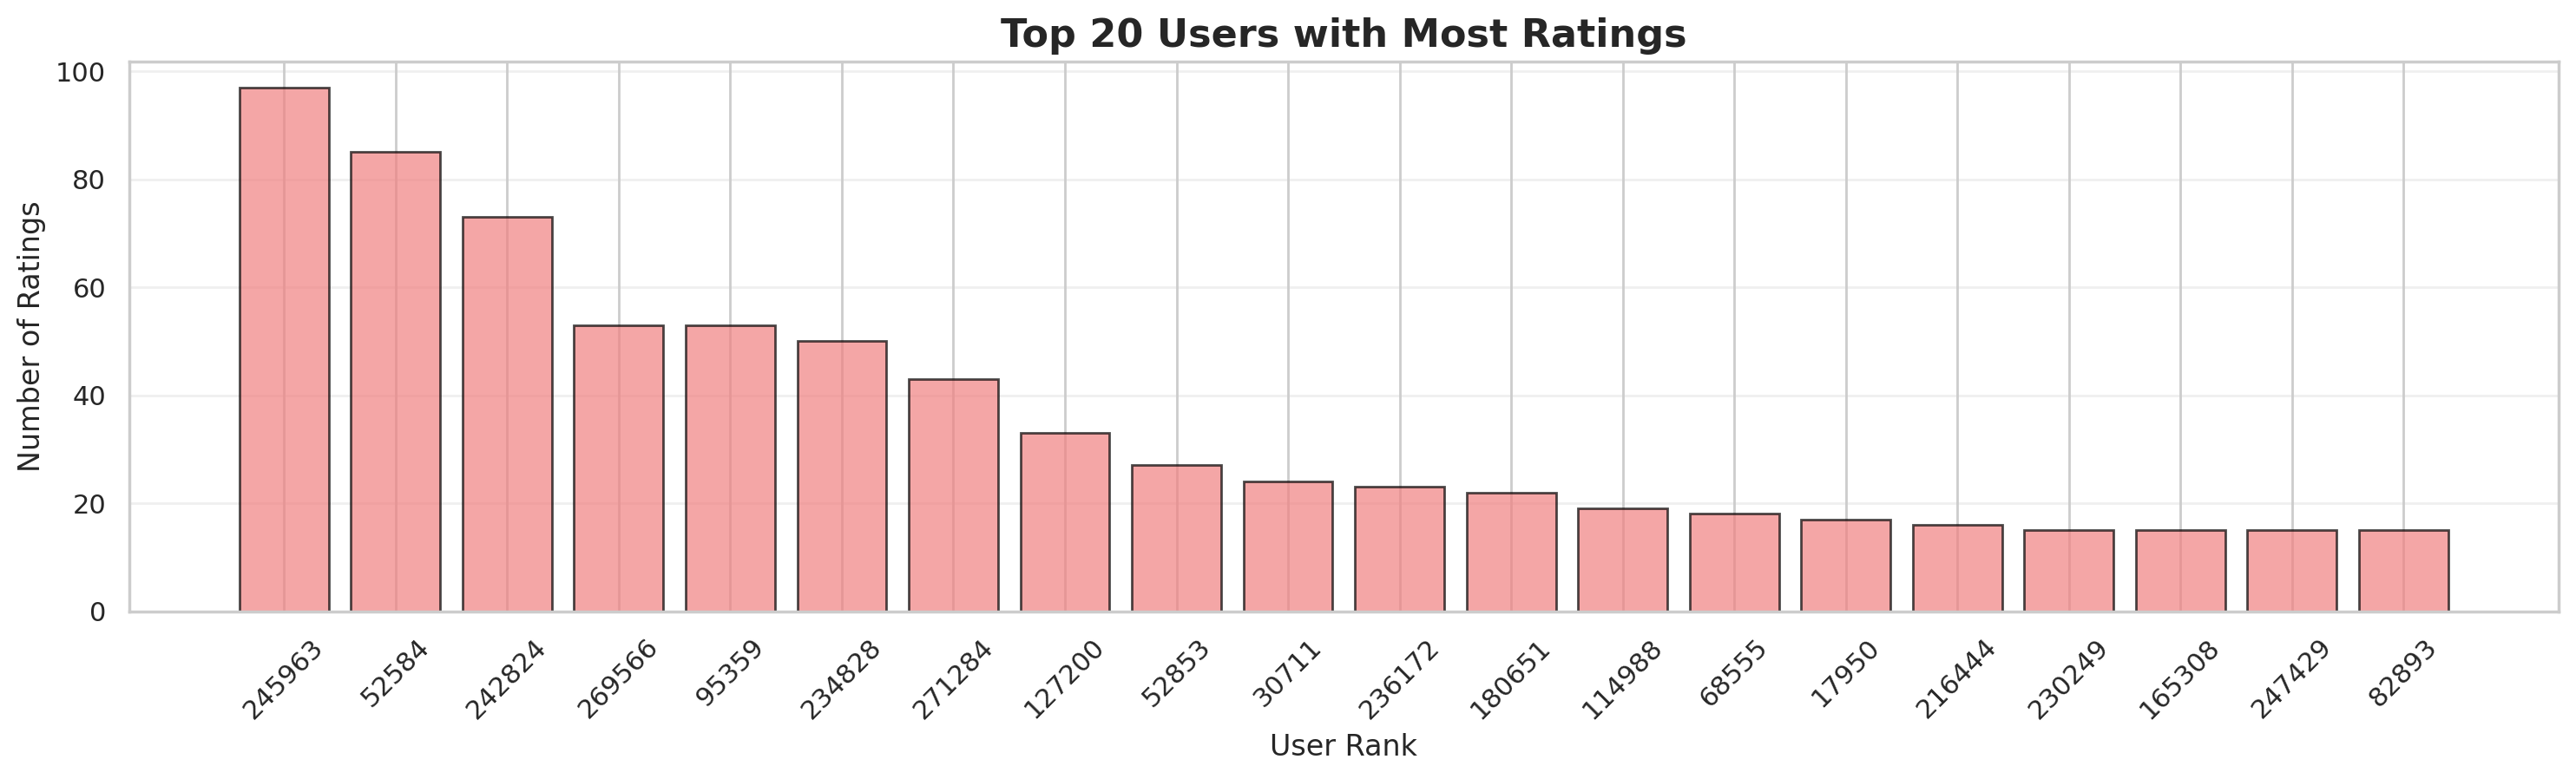

In [40]:
top_users = subset_ratings['User-ID'].value_counts().head(20)
# print(top_users)
plt.figure(figsize=(15, 8), dpi=200)
plt.subplot(2, 1, 1)
# bars = plt.bar(range(len(top_users)), top_users.index, color='lightcoral', alpha=0.7, edgecolor='black')
bars = plt.bar(top_users.index.astype(str), top_users.values, color='lightcoral', alpha=0.7, edgecolor='black')

plt.title('Top 20 Users with Most Ratings', fontsize=16, fontweight='bold')
plt.xlabel('User Rank', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(len(top_users)), top_users.index, rotation=45)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

#### Rating distribution

In [41]:
subset_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 4226 to 1144627
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      1545 non-null   int64 
 1   ISBN         1545 non-null   object
 2   Book-Rating  1545 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 48.3+ KB


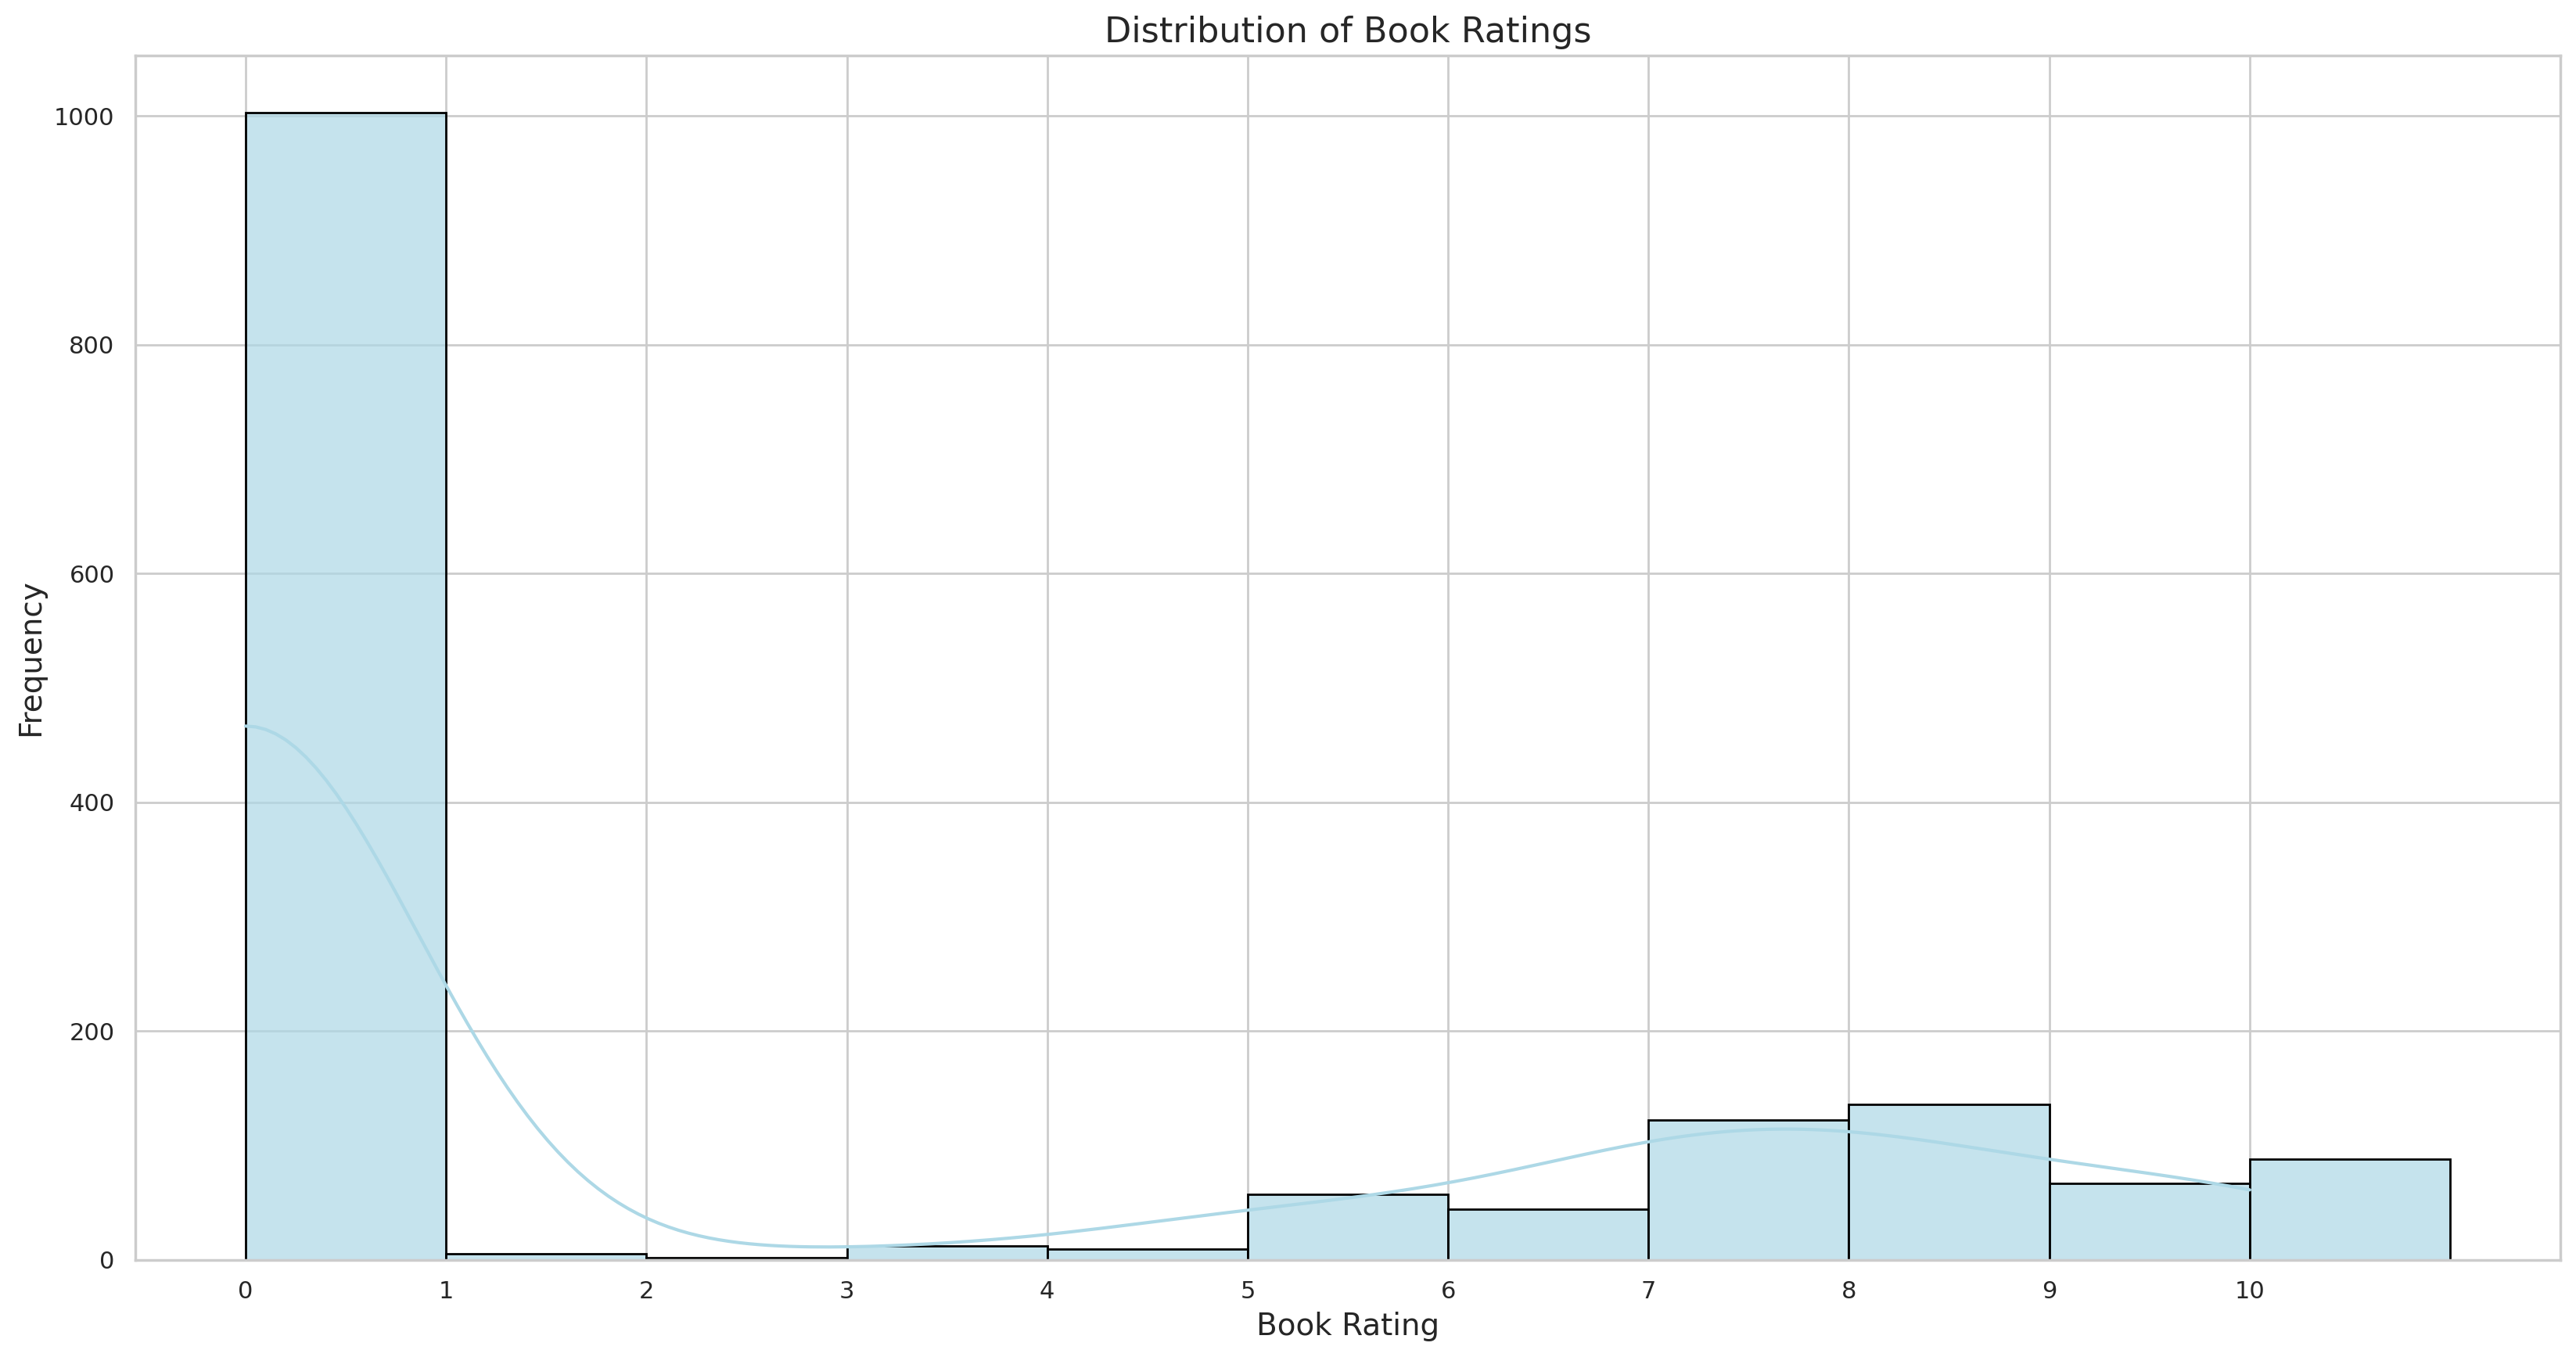

In [42]:
# Pilihan 1: Histplot (paling mirip dengan gambar asli)
plt.figure(figsize=(20,10), dpi=200)
sns.histplot(data=subset_ratings, x='Book-Rating', bins=range(0, 12), kde=True, 
             color='lightblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Book Ratings', fontsize=16)
plt.xlabel('Book Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, 11))
plt.show()

In [43]:
subset_ratings[subset_ratings['Book-Rating'] == 0]

,User-ID,ISBN,Book-Rating
17741,3332,0752851950,0
34542,8234,0891090665,0
37153,8890,2070370003,0
37301,8890,2277229938,0
37411,8890,2869304870,0
...,...,...,...
1133686,272120,0440141966,0
1133702,272120,0553285920,0
1135014,272786,0375403825,0
1136790,273470,0446320277,0


## Data Preprocessing

### Menggabungkan Buku

In [44]:
all_books = np.concatenate((
    subset_books['ISBN'].unique(),
    subset_ratings['ISBN'].unique(),
))

all_books = np.sort(np.unique(all_books))
print('Jumlah seluruh buku pada dasaset berdasarkan ISBN:', len(all_books))

Jumlah seluruh buku pada dasaset berdasarkan ISBN: 10000


### Menggabungkan Seluruh Users

In [45]:
all_users = np.concatenate((
    subset_users['User-ID'].unique(),
    subset_ratings['User-ID'].unique(),
))

all_users = np.sort(np.unique(all_users))
print('Jumlah seluruh user pada dasaset berdasarkan User-ID:', len(all_users))

Jumlah seluruh user pada dasaset berdasarkan User-ID: 10000


### Mengetahui Jumlah Rating Berdasarkan ISBN

In [46]:
print('jumlah isbn pada books df: ', subset_books.ISBN.nunique())
print('jumlah isbn pada ratings df', subset_ratings.ISBN.nunique())

print('selisih isbn pada books df dan ratings df: ', subset_books.ISBN.nunique() - subset_ratings.ISBN.nunique())

jumlah isbn pada books df:  10000
jumlah isbn pada ratings df 1119
selisih isbn pada books df dan ratings df:  8881


In [47]:
book_info = pd.merge(subset_ratings, subset_books, on='ISBN', how='inner')

book_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,278346,0394484479,9,A Bright Shining Lie: John Paul Vann and Ameri...,Neil Sheehan,1988,Random House Inc,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...
1,567,0684717255,9,I And Thou,Martin Buber,1971,Free Press,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...
2,1235,0345378490,9,Congo,Michael Crichton,1995,Ballantine Books,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...
3,2399,0345317580,7,Magic Kingdom for Sale - Sold! (Magic Kingdom ...,Terry Brooks,1990,Del Rey Books,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...
4,3332,0752851950,0,The Little Princesses,Marion Crawford,2002,Orion,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...
...,...,...,...,...,...,...,...,...,...,...
1540,272897,0859539075,7,Pocket Bunny (Pocket Pals (Safari Ltd)),Michael Twinn,1996,Child's Play International Ltd,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...
1541,272897,1577593715,7,I Am a Baby (Little Pups),Jeff Frazier,2002,Dalmatian Press,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...
1542,273470,0446320277,0,The I Inside,Alan Dean Foster,1984,Warner Books,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...
1543,274325,0399147195,9,P Is for Peril (Kinsey Millhone Mysteries (Har...,Sue Grafton,2001,Putnam Publishing Group,http://images.amazon.com/images/P/0399147195.0...,http://images.amazon.com/images/P/0399147195.0...,http://images.amazon.com/images/P/0399147195.0...


In [48]:
book_info.groupby('ISBN').sum()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,,,
0002255464,84146,7,"Goblins ;: &, Whirlwind",Charles L Grant,1996,Voyager,http://images.amazon.com/images/P/0002255464.0...,http://images.amazon.com/images/P/0002255464.0...,http://images.amazon.com/images/P/0002255464.0...
0006385729,106280,10,Island wings: A memoir,Cecil Foster,1998,HarperCollins,http://images.amazon.com/images/P/0006385729.0...,http://images.amazon.com/images/P/0006385729.0...,http://images.amazon.com/images/P/0006385729.0...
0006512062,91203,7,Trials of Tiffany Trott,Isabel Wolff,1998,Harper Collins Publishers,http://images.amazon.com/images/P/0006512062.0...,http://images.amazon.com/images/P/0006512062.0...,http://images.amazon.com/images/P/0006512062.0...
0006548830,146059,3,Information,Martin Amis,0,Flamingo,http://images.amazon.com/images/P/0006548830.0...,http://images.amazon.com/images/P/0006548830.0...,http://images.amazon.com/images/P/0006548830.0...
0020442009,155027,0,Horse and His Boy,C. S. Lewis,1970,MacMillan Publishing Company.,http://images.amazon.com/images/P/0020442009.0...,http://images.amazon.com/images/P/0020442009.0...,http://images.amazon.com/images/P/0020442009.0...
...,...,...,...,...,...,...,...,...,...
8478444211,171904,0,El Baron Rampante,Italo Calvino,1999,Siruela,http://images.amazon.com/images/P/8478444211.0...,http://images.amazon.com/images/P/8478444211.0...,http://images.amazon.com/images/P/8478444211.0...
8484281760,80221,0,Lady Macbeth de Mtsensk y Otros Relatos LXIII,Nikolai S. Leskov,2003,Alba,http://images.amazon.com/images/P/8484281760.0...,http://images.amazon.com/images/P/8484281760.0...,http://images.amazon.com/images/P/8484281760.0...
8807810794,19984,7,I meravigliosi animali di Stranalandia (Univer...,Stefano Benni,1990,Feltrinelli,http://images.amazon.com/images/P/8807810794.0...,http://images.amazon.com/images/P/8807810794.0...,http://images.amazon.com/images/P/8807810794.0...


In [49]:
book_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              1545 non-null   int64 
 1   ISBN                 1545 non-null   object
 2   Book-Rating          1545 non-null   int64 
 3   Book-Title           1545 non-null   object
 4   Book-Author          1545 non-null   object
 5   Year-Of-Publication  1545 non-null   int64 
 6   Publisher            1545 non-null   object
 7   Image-URL-S          1545 non-null   object
 8   Image-URL-M          1545 non-null   object
 9   Image-URL-L          1545 non-null   object
dtypes: int64(3), object(7)
memory usage: 120.8+ KB


In [50]:
content_column = ['Book-Title', 'Book-Author', 'Publisher']

for col in content_column:
    book_info[col] = book_info[col].str.strip()
    book_info[col] = book_info[col].str.replace("[^a-zA-Z0-9]"," ",regex=True)

book_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,278346,0394484479,9,A Bright Shining Lie John Paul Vann and Ameri...,Neil Sheehan,1988,Random House Inc,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...
1,567,0684717255,9,I And Thou,Martin Buber,1971,Free Press,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...
2,1235,0345378490,9,Congo,Michael Crichton,1995,Ballantine Books,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...
3,2399,0345317580,7,Magic Kingdom for Sale Sold Magic Kingdom ...,Terry Brooks,1990,Del Rey Books,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...
4,3332,0752851950,0,The Little Princesses,Marion Crawford,2002,Orion,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...
...,...,...,...,...,...,...,...,...,...,...
1540,272897,0859539075,7,Pocket Bunny Pocket Pals Safari Ltd,Michael Twinn,1996,Child s Play International Ltd,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...
1541,272897,1577593715,7,I Am a Baby Little Pups,Jeff Frazier,2002,Dalmatian Press,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...
1542,273470,0446320277,0,The I Inside,Alan Dean Foster,1984,Warner Books,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...
1543,274325,0399147195,9,P Is for Peril Kinsey Millhone Mysteries Har...,Sue Grafton,2001,Putnam Publishing Group,http://images.amazon.com/images/P/0399147195.0...,http://images.amazon.com/images/P/0399147195.0...,http://images.amazon.com/images/P/0399147195.0...


### Membuat Fitur Content 

In [51]:
book_info['content'] = book_info['Book-Title'] + ' ' + book_info['Book-Author'] + ' ' + book_info['Publisher']

book_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,content
0,278346,0394484479,9,A Bright Shining Lie John Paul Vann and Ameri...,Neil Sheehan,1988,Random House Inc,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...,A Bright Shining Lie John Paul Vann and Ameri...
1,567,0684717255,9,I And Thou,Martin Buber,1971,Free Press,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...,I And Thou Martin Buber Free Press
2,1235,0345378490,9,Congo,Michael Crichton,1995,Ballantine Books,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...,Congo Michael Crichton Ballantine Books
3,2399,0345317580,7,Magic Kingdom for Sale Sold Magic Kingdom ...,Terry Brooks,1990,Del Rey Books,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...,Magic Kingdom for Sale Sold Magic Kingdom ...
4,3332,0752851950,0,The Little Princesses,Marion Crawford,2002,Orion,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...,The Little Princesses Marion Crawford Orion
...,...,...,...,...,...,...,...,...,...,...,...
1540,272897,0859539075,7,Pocket Bunny Pocket Pals Safari Ltd,Michael Twinn,1996,Child s Play International Ltd,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...,Pocket Bunny Pocket Pals Safari Ltd Michae...
1541,272897,1577593715,7,I Am a Baby Little Pups,Jeff Frazier,2002,Dalmatian Press,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...,I Am a Baby Little Pups Jeff Frazier Dalmati...
1542,273470,0446320277,0,The I Inside,Alan Dean Foster,1984,Warner Books,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...,The I Inside Alan Dean Foster Warner Books
1543,274325,0399147195,9,P Is for Peril Kinsey Millhone Mysteries Har...,Sue Grafton,2001,Putnam Publishing Group,http://images.amazon.com/images/P/0399147195.0...,http://images.amazon.com/images/P/0399147195.0...,http://images.amazon.com/images/P/0399147195.0...,P Is for Peril Kinsey Millhone Mysteries Har...


## Data Preparation

### Mengatasi Missing Value

In [52]:
book_info.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
content                0
dtype: int64

In [53]:
book_info.dropna(inplace=True)

In [54]:
book_info.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
content                0
dtype: int64

In [55]:
preparation = book_info
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,content
370,84146,0002255464,7,Goblins Whirlwind,Charles L Grant,1996,Voyager,http://images.amazon.com/images/P/0002255464.0...,http://images.amazon.com/images/P/0002255464.0...,http://images.amazon.com/images/P/0002255464.0...,Goblins Whirlwind Charles L Grant Voyager
483,106280,0006385729,10,Island wings A memoir,Cecil Foster,1998,HarperCollins,http://images.amazon.com/images/P/0006385729.0...,http://images.amazon.com/images/P/0006385729.0...,http://images.amazon.com/images/P/0006385729.0...,Island wings A memoir Cecil Foster HarperCollins
384,91203,0006512062,7,Trials of Tiffany Trott,Isabel Wolff,1998,Harper Collins Publishers,http://images.amazon.com/images/P/0006512062.0...,http://images.amazon.com/images/P/0006512062.0...,http://images.amazon.com/images/P/0006512062.0...,Trials of Tiffany Trott Isabel Wolff Harper Co...
641,146059,0006548830,3,Information,Martin Amis,0,Flamingo,http://images.amazon.com/images/P/0006548830.0...,http://images.amazon.com/images/P/0006548830.0...,http://images.amazon.com/images/P/0006548830.0...,Information Martin Amis Flamingo
675,155027,0020442009,0,Horse and His Boy,C S Lewis,1970,MacMillan Publishing Company,http://images.amazon.com/images/P/0020442009.0...,http://images.amazon.com/images/P/0020442009.0...,http://images.amazon.com/images/P/0020442009.0...,Horse and His Boy C S Lewis MacMillan Publis...
...,...,...,...,...,...,...,...,...,...,...,...
346,80221,8484281760,0,Lady Macbeth de Mtsensk y Otros Relatos LXIII,Nikolai S Leskov,2003,Alba,http://images.amazon.com/images/P/8484281760.0...,http://images.amazon.com/images/P/8484281760.0...,http://images.amazon.com/images/P/8484281760.0...,Lady Macbeth de Mtsensk y Otros Relatos LXIII ...
61,19984,8807810794,7,I meravigliosi animali di Stranalandia Univer...,Stefano Benni,1990,Feltrinelli,http://images.amazon.com/images/P/8807810794.0...,http://images.amazon.com/images/P/8807810794.0...,http://images.amazon.com/images/P/8807810794.0...,I meravigliosi animali di Stranalandia Univer...
6,6280,9681336089,8,Vivir Para Contarla To Live to Tell It Span...,Gabriel Garcia Marques,2002,Diana,http://images.amazon.com/images/P/9681336089.0...,http://images.amazon.com/images/P/9681336089.0...,http://images.amazon.com/images/P/9681336089.0...,Vivir Para Contarla To Live to Tell It Span...
409,94985,9681500954,0,Lobo estepario,Hermann Hesse,1998,Editorial Diana S A,http://images.amazon.com/images/P/9681500954.0...,http://images.amazon.com/images/P/9681500954.0...,http://images.amazon.com/images/P/9681500954.0...,Lobo estepario Hermann Hesse Editorial Diana ...


In [56]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,content
0,278346,0394484479,9,A Bright Shining Lie John Paul Vann and Ameri...,Neil Sheehan,1988,Random House Inc,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...,http://images.amazon.com/images/P/0394484479.0...,A Bright Shining Lie John Paul Vann and Ameri...
1,567,0684717255,9,I And Thou,Martin Buber,1971,Free Press,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...,http://images.amazon.com/images/P/0684717255.0...,I And Thou Martin Buber Free Press
2,1235,0345378490,9,Congo,Michael Crichton,1995,Ballantine Books,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...,http://images.amazon.com/images/P/0345378490.0...,Congo Michael Crichton Ballantine Books
3,2399,0345317580,7,Magic Kingdom for Sale Sold Magic Kingdom ...,Terry Brooks,1990,Del Rey Books,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...,http://images.amazon.com/images/P/0345317580.0...,Magic Kingdom for Sale Sold Magic Kingdom ...
4,3332,0752851950,0,The Little Princesses,Marion Crawford,2002,Orion,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...,http://images.amazon.com/images/P/0752851950.0...,The Little Princesses Marion Crawford Orion
...,...,...,...,...,...,...,...,...,...,...,...
1539,272897,0789428105,6,My Pony Book,Louise Pritchard,1998,Dorling Kindersley Publishing,http://images.amazon.com/images/P/0789428105.0...,http://images.amazon.com/images/P/0789428105.0...,http://images.amazon.com/images/P/0789428105.0...,My Pony Book Louise Pritchard Dorling Kindersl...
1540,272897,0859539075,7,Pocket Bunny Pocket Pals Safari Ltd,Michael Twinn,1996,Child s Play International Ltd,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...,http://images.amazon.com/images/P/0859539075.0...,Pocket Bunny Pocket Pals Safari Ltd Michae...
1541,272897,1577593715,7,I Am a Baby Little Pups,Jeff Frazier,2002,Dalmatian Press,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...,http://images.amazon.com/images/P/1577593715.0...,I Am a Baby Little Pups Jeff Frazier Dalmati...
1542,273470,0446320277,0,The I Inside,Alan Dean Foster,1984,Warner Books,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...,http://images.amazon.com/images/P/0446320277.0...,The I Inside Alan Dean Foster Warner Books


In [57]:
# Mengonversi data series ISBN menjadi dalam bentuk list
isbn = preparation['ISBN'].tolist()
    
# Mengonversi data series Book-Title menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()
    
# Mengonversi data series content menjadi dalam bentuk list
content = preparation['content'].tolist()
    
print(len(isbn))
print(len(book_title))
print(len(content))

1119
1119
1119


In [58]:
books_cleaned = pd.DataFrame({
    'ISBN': isbn,
    'Book-Title': book_title,
    'content': content
})

books_cleaned

,ISBN,Book-Title,content
0,0394484479,A Bright Shining Lie John Paul Vann and Ameri...,A Bright Shining Lie John Paul Vann and Ameri...
1,0684717255,I And Thou,I And Thou Martin Buber Free Press
2,0345378490,Congo,Congo Michael Crichton Ballantine Books
3,0345317580,Magic Kingdom for Sale Sold Magic Kingdom ...,Magic Kingdom for Sale Sold Magic Kingdom ...
4,0752851950,The Little Princesses,The Little Princesses Marion Crawford Orion
...,...,...,...
1114,0789428105,My Pony Book,My Pony Book Louise Pritchard Dorling Kindersl...
1115,0859539075,Pocket Bunny Pocket Pals Safari Ltd,Pocket Bunny Pocket Pals Safari Ltd Michae...
1116,1577593715,I Am a Baby Little Pups,I Am a Baby Little Pups Jeff Frazier Dalmati...
1117,0446320277,The I Inside,The I Inside Alan Dean Foster Warner Books


## Model Development dengan Content Based Filtering

### TF-IDF Vectorizer

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(stop_words='english')

tfidf = TfidfVectorizer(max_features=50000, stop_words='english', min_df=5, max_df=0.8)

tfidf_matrix = tfidf.fit_transform(books_cleaned['content'])

tfidf.get_feature_names_out()

array(['agatha', 'alan', 'amer', 'america', 'american', 'ann', 'anne',
       'arthur', 'avon', 'baby', 'baen', 'baker', 'ballantine', 'bantam',
       'barbara', 'bbe', 'berkley', 'best', 'betty', 'big', 'blake',
       'body', 'book', 'books', 'boy', 'boys', 'bride', 'brown', 'carole',
       'cat', 'charles', 'charlotte', 'children', 'childrens', 'christie',
       'christmas', 'chronicles', 'classic', 'classics', 'company',
       'cook', 'corp', 'corporation', 'crimes', 'crown', 'daniel',
       'david', 'day', 'dead', 'dean', 'death', 'del', 'delacorte',
       'dell', 'der', 'diana', 'die', 'distribooks', 'dog', 'doubleday',
       'dreams', 'dtv', 'edition', 'elizabeth', 'emily', 'essays',
       'faith', 'family', 'fantasy', 'fawcett', 'fiction', 'food',
       'george', 'girl', 'golden', 'goldmann', 'good', 'gordon', 'graham',
       'great', 'green', 'group', 'guide', 'harcourt', 'hardcover',
       'harlequin', 'harper', 'harpercollins', 'harpertorch',
       'harpertrophy'

In [60]:
tfidf_matrix.shape

(1119, 249)

In [64]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tfidf.get_feature_names_out(),
    index=books_cleaned.ISBN
).sample(21, axis=1).sample(10, axis=0)

,pulse,king,peter,melanie,moments,schuster,emily,silhouette,taylor,special,...,corp,harpertrophy,la,jane,jove,mary,novels,nelson,presents,baby
ISBN,,,,,,,,,,,,,,,,,,,,,
003055487X,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0752851950,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0441535038,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0671742493,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1860463312,0.0,0.0,0.693261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0451129040,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1576735990,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0553242334,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0553245619,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(tfidf_matrix)


### Mendapatkan Rekomendasi

In [82]:
import pandas as pd
import numpy as np
import random
from IPython.display import HTML, display

book_index = random.randint(0, len(books_cleaned) - 1)

similar_scores = list(enumerate(cos_sim[book_index]))
sorted_books = sorted(similar_scores, key=lambda x: x[1], reverse=True)

target_book = book_info.iloc[book_index]
target_info = book_info[book_info['ISBN'] == target_book['ISBN']]
target_image = target_info.iloc[0]['Image-URL-M'] if len(target_info) > 0 and pd.notna(target_info.iloc[0]['Image-URL-M']) else None

print("🎯 TARGET BOOK")
print("="*50)
print(f"📖 {target_book['Book-Title']}")
print(f"👤 {target_book['Book-Author']}")
if target_image:
    display(HTML(f'<img src="{target_image}" style="width:120px; height:180px; object-fit:cover; border-radius:8px; margin:10px 0;">'))
print()

print("🎯 TOP 5 RECOMMENDATIONS")
print("="*50)

for rank, (idx, score) in enumerate(sorted_books[1:6], 1):
    rec_book = book_info.iloc[idx]
    rec_info = book_info[book_info['ISBN'] == rec_book['ISBN']]
    
    rank_emoji = {1: "🥇", 2: "🥈", 3: "🥉", 4: "4️⃣", 5: "5️⃣"}
    
    print(f"{rank_emoji[rank]} RANK #{rank} | Score: {score:.3f}")
    print(f"📚 {rec_book['Book-Title']}")
    print(f"✍️  {rec_book.get('Book-Author')}")
    
    if len(rec_info) > 0 and pd.notna(rec_info.iloc[0]['Image-URL-M']):
        img_url = rec_info.iloc[0]['Image-URL-S']
        display(HTML(f'<img src="{img_url}" style="width:100px; height:150px; object-fit:cover; border-radius:5px; margin:5px 0;">'))
    else:
        print("📷 No image available")
    
    print("-" * 40)

🎯 TARGET BOOK
📖 Revenge   A Novel
👤 STEPHEN FRY



🎯 TOP 5 RECOMMENDATIONS
🥇 RANK #1 | Score: 0.599
📚 Return to Harmony
✍️  Janette Oke


----------------------------------------
🥈 RANK #2 | Score: 0.599
📚 Death and Restoration  Art History Mystery 
✍️  Iain Pears


----------------------------------------
🥉 RANK #3 | Score: 0.536
📚 Polgara the Sorceress
✍️  David Eddings


----------------------------------------
4️⃣ RANK #4 | Score: 0.516
📚 Legend in Green Velvet
✍️  Elizabeth Peters


----------------------------------------
5️⃣ RANK #5 | Score: 0.516
📚 Sanctuary  The Corrected Text
✍️  William Faulkner


----------------------------------------


In [136]:
subset_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 4 to 278824
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   10000 non-null  int64  
 1   Location  10000 non-null  object 
 2   Age       5998 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 312.5+ KB


In [141]:
subset_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
49,0440223571,This Year It Will Be Different: And Other Stories,Maeve Binchy,1997,Dell,http://images.amazon.com/images/P/0440223571.0...,http://images.amazon.com/images/P/0440223571.0...,http://images.amazon.com/images/P/0440223571.0...
61,0679810307,Shabanu: Daughter of the Wind (Border Trilogy),SUZANNE FISHER STAPLES,1991,Laurel Leaf,http://images.amazon.com/images/P/0679810307.0...,http://images.amazon.com/images/P/0679810307.0...,http://images.amazon.com/images/P/0679810307.0...
84,0743403843,Decipher,Stel Pavlou,2002,Simon & Schuster (Trade Division),http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...
86,0060177586,Standing Firm: A Vice-Presidential Memoir,Dan Quayle,1994,Harpercollins,http://images.amazon.com/images/P/0060177586.0...,http://images.amazon.com/images/P/0060177586.0...,http://images.amazon.com/images/P/0060177586.0...
144,0451410319,Hush,Anne Frasier,2002,Onyx Books,http://images.amazon.com/images/P/0451410319.0...,http://images.amazon.com/images/P/0451410319.0...,http://images.amazon.com/images/P/0451410319.0...
...,...,...,...,...,...,...,...,...
271235,981232397X,Journeys Through Southeast Asia - Ceritalah 2,Karim Raslan,2002,Times Media Pte Ltd,http://images.amazon.com/images/P/981232397X.0...,http://images.amazon.com/images/P/981232397X.0...,http://images.amazon.com/images/P/981232397X.0...
271263,3426618354,Wer stirbt schon gerne in Italien?,Michael BÃ?Â¶ckler,2001,"Droemersche Verlagsanstalt Th. Knaur Nachf., G...",http://images.amazon.com/images/P/3426618354.0...,http://images.amazon.com/images/P/3426618354.0...,http://images.amazon.com/images/P/3426618354.0...
271308,189369948X,Iron Insects Invade Indiana (American Chillers),Johnathan Rand,2003,Audio Craft Press,http://images.amazon.com/images/P/189369948X.0...,http://images.amazon.com/images/P/189369948X.0...,http://images.amazon.com/images/P/189369948X.0...
271330,0304329045,How Can You Write a Poem When You Are Dying of...,John Harold,1994,Cassell,http://images.amazon.com/images/P/0304329045.0...,http://images.amazon.com/images/P/0304329045.0...,http://images.amazon.com/images/P/0304329045.0...


## Model Development dengan Collaborative Filtering

### Data Understanding

In [83]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

2025-05-24 12:27:48.687370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748064468.794875    7309 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748064468.837258    7309 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748064469.254538    7309 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748064469.254568    7309 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748064469.254571    7309 computation_placer.cc:177] computation placer alr

In [93]:
df = subset_ratings
df

,User-ID,ISBN,Book-Rating,user,isbn
4226,278346,0394484479,9.0,0,NaN
10961,567,0684717255,9.0,1,NaN
12525,1235,0345378490,9.0,2,NaN
15721,2399,0345317580,7.0,3,NaN
17741,3332,0752851950,0.0,4,NaN
...,...,...,...,...,...
1135184,272897,0859539075,7.0,463,NaN
1135192,272897,1577593715,7.0,463,NaN
1136790,273470,0446320277,0.0,464,NaN
1142191,274325,0399147195,9.0,465,NaN


In [94]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)
    
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
    
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [278346, 567, 1235, 2399, 3332, 4433, 6280, 8234, 8890, 9139, 9227, 9747, 9991, 10199, 10921, 12818, 13104, 14151, 14456, 15834, 15852, 16248, 16673, 16721, 17950, 18487, 19984, 20570, 21962, 24672, 25009, 25674, 26883, 28899, 30035, 30324, 30711, 32134, 33890, 34310, 35845, 36551, 36568, 37399, 37493, 39497, 40129, 41111, 42410, 44037, 45107, 45410, 45765, 47293, 47970, 48575, 49166, 49400, 50545, 50711, 50723, 51359, 51571, 51663, 52584, 52853, 53077, 53496, 54898, 55142, 55203, 55272, 55399, 55853, 57960, 58456, 58821, 58855, 59148, 59189, 59389, 60028, 60262, 60684, 62457, 62680, 62753, 63243, 65447, 65465, 66640, 67838, 67910, 68146, 68528, 68555, 68846, 69089, 70055, 70224, 71940, 72028, 74453, 74810, 75060, 76726, 77229, 79055, 79506, 79724, 80221, 81274, 81352, 82460, 82659, 82893, 83259, 84146, 84308, 84427, 84589, 84942, 86123, 86548, 86586, 87388, 87400, 88390, 91203, 91633, 92263, 92282, 92861, 94153, 94314, 94897, 94946, 94985, 95359, 96214, 97875, 98004, 984

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_ids = df['ISBN'].unique().tolist()
print('list ISBN: ', isbn_ids)
    
# Melakukan proses encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}
print('encoded ISBN : ', isbn_to_isbn_encoded)
    
# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}
print('encoded angka ke ISBN: ', isbn_encoded_to_isbn)

list ISBN:  ['0394484479', '0684717255', '0345378490', '0345317580', '0752851950', '1844261085', '9681336089', '0671038567', '0891090665', '2020551306', '2070370003', '2070388425', '2226116745', '2253012556', '2260012078', '2277229938', '2842630254', '2869304870', '0590462261', '039304808X', '0786889209', '0316899984', '0440176484', '0452266637', '055338189X', '0140124381', '0156027321', '0732264472', '1860463312', '0060391626', '0684870673', '0061030635', '0060921145', '0679454470', '0440940001', '0802135226', '1931847010', '8426412386', '0380690969', '0425180638', '0440129613', '0449125092', '0671026364', '0064408647', '007021316X', '0140187367', '0141302283', '042515291X', '0425169693', '0446517984', '0553261681', '0553263390', '0553284673', '0670835382', '0670844527', '0679446486', '0749390484', '0807282316', '1558745157', '0671684094', '8807810794', '0440407079', '0553571656', '0330338390', '0373262027', '0380752859', '0345342968', '0312979487', '0330482076', '0380789035', '074725

In [96]:
df

,User-ID,ISBN,Book-Rating,user,isbn
4226,278346,0394484479,9.0,0,NaN
10961,567,0684717255,9.0,1,NaN
12525,1235,0345378490,9.0,2,NaN
15721,2399,0345317580,7.0,3,NaN
17741,3332,0752851950,0.0,4,NaN
...,...,...,...,...,...
1135184,272897,0859539075,7.0,463,NaN
1135192,272897,1577593715,7.0,463,NaN
1136790,273470,0446320277,0.0,464,NaN
1142191,274325,0399147195,9.0,465,NaN


In [97]:
# Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
    
# Mapping ISBN ke dataframe isbn
df['isbn'] = df['ISBN'].map(isbn_to_isbn_encoded)

In [105]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
    
# Mendapatkan jumlah isbn
num_books = len(isbn_encoded_to_isbn)
print(num_books)
    
# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
    
# Nilai minimum rating
min_rating = min(df['Book-Rating'])
    
# Nilai maksimal rating
max_rating = max(df['Book-Rating'])
    
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

467
1119
Number of User: 467, Number of Resto: 1119, Min Rating: 0.0, Max Rating: 10.0


### Membagi Data untuk Training dan Validasi

In [99]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,isbn
1130448,271284,0425067890,0.0,457,1084
505718,123056,044173295X,7.0,180,437
1026926,245963,0373107498,0.0,419,929
494242,118533,0439098645,10.0,173,425
982061,236172,0446692379,0.0,394,794
...,...,...,...,...,...
1002959,240700,0064472264,8.0,404,819
1027560,245963,0440502721,0.0,419,950
782447,189392,0718133021,0.0,304,638
1123724,269566,0590334662,0.0,454,1058


In [100]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'isbn']].values
    
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
    
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
    
print(x, y)

[[ 457 1084]
 [ 180  437]
 [ 419  929]
 ...
 [ 304  638]
 [ 454 1058]
 [ 402  816]] [0.  0.7 0.  ... 0.  0.  1. ]


### Proses Training

In [124]:
class RecommenderNet(tf.keras.Model):
     
    # Insialisasi fungsi
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(
            num_users,
            1) # layer embedding user bias
        
        self.book_embedding = layers.Embedding( # layer embeddings book
            num_books,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )

        self.book_bias = layers.Embedding(
            num_books, 
            1) # layer embedding book bias
        self.dropout = layers.Dropout(0.2) # layer dropout
        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
     
        dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
     
        x = dot_user_book + user_bias + book_bias
        
        return tf.nn.sigmoid(x) # activation sigmoid



In [125]:
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model
    
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [126]:
# Memulai training
    
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6934 - root_mean_squared_error: 0.4457 - val_loss: 0.6802 - val_root_mean_squared_error: 0.4352
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6344 - root_mean_squared_error: 0.4096 - val_loss: 0.6685 - val_root_mean_squared_error: 0.4284
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5934 - root_mean_squared_error: 0.3787 - val_loss: 0.6585 - val_root_mean_squared_error: 0.4226
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5326 - root_mean_squared_error: 0.3515 - val_loss: 0.6510 - val_root_mean_squared_error: 0.4182
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5344 - root_mean_squared_error: 0.3484 - val_loss: 0.6443 - val_root_mean_squared_error: 0.4143
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5181 - root_mean_squared_error: 0.3426 - val_loss: 0.6387 - val_root_mean_squared_error: 0.4111
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

### Mendapatkan Rekomendasi ISBN

In [131]:
import pandas as pd
import numpy as np
import random
from IPython.display import HTML, display

def get_book_recommendations(model, user_to_user_encoded, isbn_to_isbn_encoded, 
                           subset_users, subset_ratings, book_info, user_id=None):
    """
    Generate book recommendations for a user using the trained model
    """
    
    # Random user selection if no user_id provided
    if user_id is None:
        user_id = subset_users['User-ID'].sample(1).iloc[0]
    
    print(f"🔍 Processing recommendations for User ID: {user_id}")
    
    # Check if user exists in encoding
    if user_id not in user_to_user_encoded:
        print(f"❌ User {user_id} not found in user encodings")
        return None
    
    # Get user encoder
    user_encoder = user_to_user_encoded[user_id]
    print(f"   User encoder: {user_encoder} (type: {type(user_encoder)})")
    
    # Ensure user_encoder is integer
    try:
        user_encoder = int(user_encoder)
    except (ValueError, TypeError):
        print(f"❌ Invalid user encoder: {user_encoder}")
        return None
    
    # Books rated by this user
    books_rated_by_user = subset_ratings[subset_ratings['User-ID'] == user_id]
    
    # Books NOT rated by this user
    all_books = set(subset_ratings['ISBN'].unique())
    books_rated = set(books_rated_by_user['ISBN'].values)
    books_not_rated = list(all_books - books_rated)
    
    print(f"   Books rated by user: {len(books_rated_by_user)}")
    print(f"   Books not rated: {len(books_not_rated)}")
    
    # Filter and encode books, ensuring no None values
    valid_user_book_pairs = []
    valid_books = []
    
    for book_isbn in books_not_rated:
        if book_isbn in isbn_to_isbn_encoded:
            book_encoder = isbn_to_isbn_encoded[book_isbn]
            
            # Ensure book_encoder is valid integer
            try:
                book_encoder = int(book_encoder)
                valid_user_book_pairs.append([user_encoder, book_encoder])
                valid_books.append(book_isbn)
            except (ValueError, TypeError):
                continue
    
    print(f"   Valid books for prediction: {len(valid_books)}")
    
    if len(valid_user_book_pairs) == 0:
        print("❌ No valid books available for recommendation")
        return None
    
    # Create numpy array with explicit integer dtype
    user_book_array = np.array(valid_user_book_pairs, dtype=np.int32)
    
    print(f"   Array shape: {user_book_array.shape}")
    print(f"   Array dtype: {user_book_array.dtype}")
    print(f"   Array min/max: {user_book_array.min()}/{user_book_array.max()}")
    print()
    
    # Verify array integrity
    if np.any(np.isnan(user_book_array)) or np.any(np.isinf(user_book_array)):
        print("❌ Array contains NaN or Inf values")
        return None
    
    try:
        # Get predictions from model
        predictions = model.predict(user_book_array, verbose=0).flatten()
        
        # Get top 10 recommendations
        top_indices = predictions.argsort()[-10:][::-1]
        recommended_book_scores = [(valid_books[i], predictions[i]) for i in top_indices]
        
        print("🎯 USER-BASED BOOK RECOMMENDATIONS")
        print("="*60)
        print(f"👤 User ID: {user_id}")
        print(f"📊 Books rated by user: {len(books_rated_by_user)}")
        print(f"🔮 Generated recommendations from {len(valid_books)} unrated books")
        print()
        
        # Show user's top rated books
        print("📚 USER'S TOP RATED BOOKS")
        print("-"*40)
        if len(books_rated_by_user) > 0:
            top_user_books = books_rated_by_user.sort_values('Book-Rating', ascending=False).head(3)
            
            for idx, (_, book_row) in enumerate(top_user_books.iterrows(), 1):
                book_details = book_info[book_info['ISBN'] == book_row['ISBN']]
                if len(book_details) > 0:
                    book_detail = book_details.iloc[0]
                    print(f"⭐ {book_row['Book-Rating']}/10 | {book_detail['Book-Title']}")
                    print(f"   👤 {book_detail['Book-Author']}")
                    
                    # Show image if available
                    if pd.notna(book_detail.get('Image-URL-M')):
                        display(HTML(f'<img src="{book_detail["Image-URL-M"]}" style="width:80px; height:120px; object-fit:cover; border-radius:5px; margin:5px 0;">'))
                    print()
        else:
            print("❌ No rated books found for this user")
        
        print()
        print("🤖 TOP 5 ML RECOMMENDATIONS")
        print("="*50)
        
        # Show top 5 recommendations
        for rank, (isbn, score) in enumerate(recommended_book_scores[:5], 1):
            book_details = book_info[book_info['ISBN'] == isbn]
            
            if len(book_details) > 0:
                book_detail = book_details.iloc[0]
                
                # Rank emoji
                rank_emoji = {1: "🥇", 2: "🥈", 3: "🥉", 4: "4️⃣", 5: "5️⃣"}
                
                print(f"{rank_emoji[rank]} RANK #{rank} | Predicted Rating: {score:.3f}")
                print(f"📖 {book_detail['Book-Title']}")
                print(f"✍️  {book_detail['Book-Author']}")
                print(f"🏷️  {book_detail.get('Publisher', 'Unknown Publisher')}")
                
                # Display image if available
                if pd.notna(book_detail.get('Image-URL-M')):
                    display(HTML(f'<img src="{book_detail["Image-URL-M"]}" style="width:100px; height:150px; object-fit:cover; border-radius:5px; margin:5px 0;">'))
                else:
                    print("📷 No image available")
                
                print("-" * 40)
        
       
        return recommended_book_scores
        
    except Exception as e:
        print(f"❌ Error during prediction: {str(e)}")
        print(f"   Error type: {type(e).__name__}")
        return None

def validate_encodings(user_to_user_encoded, isbn_to_isbn_encoded):
    """
    Validate that all encodings are proper integers
    """
    print("🔍 VALIDATING ENCODINGS")
    print("-"*30)
    
    # Check user encodings
    invalid_users = []
    for user_id, encoding in user_to_user_encoded.items():
        try:
            int(encoding)
        except (ValueError, TypeError):
            invalid_users.append((user_id, encoding))
    
    # Check ISBN encodings
    invalid_isbns = []
    for isbn, encoding in isbn_to_isbn_encoded.items():
        try:
            int(encoding)
        except (ValueError, TypeError):
            invalid_isbns.append((isbn, encoding))
    
    print(f"✅ Valid user encodings: {len(user_to_user_encoded) - len(invalid_users)}")
    print(f"❌ Invalid user encodings: {len(invalid_users)}")
    print(f"✅ Valid ISBN encodings: {len(isbn_to_isbn_encoded) - len(invalid_isbns)}")
    print(f"❌ Invalid ISBN encodings: {len(invalid_isbns)}")
    
    if invalid_users:
        print(f"\nInvalid user encodings (first 5): {invalid_users[:5]}")
    if invalid_isbns:
        print(f"Invalid ISBN encodings (first 5): {invalid_isbns[:5]}")
    
    return len(invalid_users) == 0 and len(invalid_isbns) == 0

def fix_encodings(df, user_col='User-ID', isbn_col='ISBN'):
    """
    Create clean integer encodings for users and ISBNs
    """
    print("🛠️  CREATING CLEAN ENCODINGS")
    print("-"*30)
    
    # Get unique values and sort them for consistent encoding
    unique_users = sorted(df[user_col].unique())
    unique_isbns = sorted(df[isbn_col].unique())
    
    # Create clean integer encodings starting from 0
    user_to_user_encoded = {user_id: idx for idx, user_id in enumerate(unique_users)}
    isbn_to_isbn_encoded = {isbn: idx for idx, isbn in enumerate(unique_isbns)}
    
    # Create reverse mappings
    user_encoded_to_user = {idx: user_id for user_id, idx in user_to_user_encoded.items()}
    isbn_encoded_to_isbn = {idx: isbn for isbn, idx in isbn_to_isbn_encoded.items()}
    
    print(f"✅ Created {len(user_to_user_encoded)} user encodings")
    print(f"✅ Created {len(isbn_to_isbn_encoded)} ISBN encodings")
    print(f"📊 User encoding range: 0 to {len(user_to_user_encoded)-1}")
    print(f"📊 ISBN encoding range: 0 to {len(isbn_to_isbn_encoded)-1}")
    
    return user_to_user_encoded, isbn_to_isbn_encoded, user_encoded_to_user, isbn_encoded_to_isbn


In [132]:
recommendations = get_book_recommendations(
    model=model,
    user_to_user_encoded=user_to_user_encoded,
    isbn_to_isbn_encoded=isbn_to_isbn_encoded,
    subset_users=df,
    subset_ratings=df,
    book_info=book_info
)

🔍 Processing recommendations for User ID: 146722
   User encoder: 221 (type: <class 'int'>)
   Books rated by user: 1
   Books not rated: 1118
   Valid books for prediction: 1118
   Array shape: (1118, 2)
   Array dtype: int32
   Array min/max: 0/1118

🎯 USER-BASED BOOK RECOMMENDATIONS
👤 User ID: 146722
📊 Books rated by user: 1
🔮 Generated recommendations from 1118 unrated books

📚 USER'S TOP RATED BOOKS
----------------------------------------
⭐ 5.0/10 | Simply Sinful  Simply  Harlequin  
   👤 Carly Phillips




🤖 TOP 5 ML RECOMMENDATIONS
🥇 RANK #1 | Predicted Rating: 0.921
📖 Summerland
✍️  Michael Chabon
🏷️  Miramax Kids


----------------------------------------
🥈 RANK #2 | Predicted Rating: 0.911
📖 The Monster at the End of This Book  Jellybean Books Tm   
✍️  Jon Stone
🏷️  Rhcp Mass Market


----------------------------------------
🥉 RANK #3 | Predicted Rating: 0.908
📖 Emily of Deep Valley  Deep Valley Book 
✍️  Maud Hart Lovelace
🏷️  HarperTrophy


----------------------------------------
4️⃣ RANK #4 | Predicted Rating: 0.907
📖 Love  Greg   Lauren
✍️  Greg Manning
🏷️  Bantam


----------------------------------------
5️⃣ RANK #5 | Predicted Rating: 0.906
📖 Orfe
✍️  Cynthia Voigt
🏷️  Simon Pulse


----------------------------------------


### Visualisasi Metrik

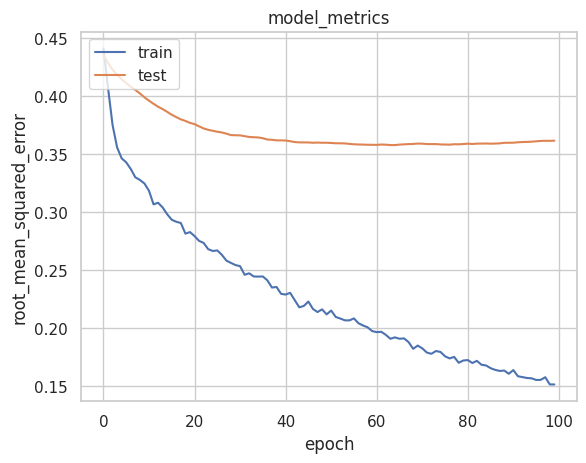

In [133]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model dievaluasi menggunakan metrik Root Mean Squared Error (RMSE), yang mengukur jarak rata-rata kuadrat antara nilai rating prediksi dan aktual. RMSE dipilih karena sesuai untuk data rating eksplisit. Berdasarkan grafik learning curve, RMSE pada data training terus menurun hingga sekitar 0.15, sedangkan pada data testing stabil di angka sekitar 0.35. Hal ini menunjukkan model belajar dengan baik namun cenderung mengalami overfitting setelah sekitar 40 epoch.